# Financial data analysis of S&P 500 companies 

## Part 1: Exploration of Microsoft.

## 1. Project introduction

**Goal**: The goal of this project is to identify stocks that are of good quality and (preferably) undervalued by the market in order to get rich. In Part 1, the goal is **not** to create an automated trading strategy, but rather make the financial data more digestible, learn how to intepret it, identify relevant patterns and identify bottlenecks to creating more advanced trading strategies. To achieve this, I'll use data analysis techniques on Microsoft to provide answers to the following 2 questions: <br>
1. Is Microsoft of good quality from a financial point of view? This is called fundamental analysis.
2. Is Microsoft undervalued relative to their quality and when should we buy them? This is called technical analysis.

In Part 2, I'll set up data infrastructure for automated trading analysis using a better API and try to keep the most interesting analyses. In Part 3, I'll try to find quantitative indicators for the following question: 
3. Which stocks are good from a non-financial point of view? This is harder to quantify, but could include market sentiment, past performance of management, sentiment of managerial statements, personal preference, ...

**Method**: To answer the first two questions, I will download stock data for Microsoft using the yfinance library (https://pypi.org/project/yfinance/). The yfinance library is great for beginners to learn about data-supported finance, but has a few disadvantages. The most important one is that it uses a web scraper for some functions, meaning that you could get blacklisted if you try to do too many calls. For this reason, I'll focus this analysis on the Microsoft stock. I'll analyze the period from 2000-2021 and visualize the final results in a Tableau workbook that allows the user to look at all the metrics of the stock at once and that gives advice on the stock. 

## 2. Data exploration and metric selection


### 2.1 Available data metrics for an example: Microsoft data

Since my computational resources are limited at present and I anticipate that 20 years worth of metrics for 500 companies will result in a lot of data, I'll start by only maintaining relevant columns. To find that out, I'll first explore what columns are available for one of these companies: Microsoft. From there, I'll reason what data is most relevant for a first pass. Let's first import required libraries and connect to the Microsoft data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import yfinance as yf

plt.style.use("seaborn")

msft = yf.Ticker("msft")

Pandas is used to work with DataFrames, an easy-to-use and popular data structure to store tabular data. Matplotlib is used for plotting and datetime is used for manipulating dates (useful when you are exploring financial data). yfinance is a library that facilitates retrieving and manipulating financial data. By using the Ticker method with an appropriate company code (the ticker), you can retrieve all of that company's data as an object. This object stores different kinds of data as attributes. Let's explore what these attributes are:

In [2]:
print(dir(msft))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_analysis', '_balancesheet', '_base_url', '_calendar', '_cashflow', '_download_options', '_earnings', '_expirations', '_financials', '_fundamentals', '_get_fundamentals', '_history', '_info', '_institutional_holders', '_isin', '_major_holders', '_mutualfund_holders', '_news', '_options2df', '_recommendations', '_scrape_url', '_shares', '_sustainability', 'actions', 'analysis', 'balance_sheet', 'balancesheet', 'calendar', 'cashflow', 'dividends', 'earnings', 'financials', 'get_actions', 'get_analysis', 'get_balance_sheet', 'get_balancesheet', 'get_calendar', 'get_cashflow', 'get_dividends', 'get_earnings', 'get_financials', 'get_info', 'get_instit

#### 2.1.1 Fundamental data metrics

Let's explain some of the key fundamental financial attributes here. The first one is the **balancesheet** attribute. The balancesheet provides an overview of everything a company owes and owns and is an important tool to understand the financial situation of a company. More specifically, the balance sheet tells you whether a company has a good asset vs debt ratio and whether the company is theoretically capable of paying off all its debt. This is called a company's **solvency**.

In [3]:
print(msft.balancesheet)

                                    2021-06-30    2020-06-30    2019-06-30  \
Intangible Assets                 7.800000e+09  7.038000e+09  7.750000e+09   
Total Liab                        1.917910e+11  1.830070e+11  1.842260e+11   
Total Stockholder Equity          1.419880e+11  1.183040e+11  1.023300e+11   
Other Current Liab                5.261200e+10  4.600100e+10  4.586000e+10   
Total Assets                      3.337790e+11  3.013110e+11  2.865560e+11   
Common Stock                      8.311100e+10  8.055200e+10  7.852000e+10   
Other Current Assets              1.347100e+10  1.151700e+10  1.013300e+10   
Retained Earnings                 5.705500e+10  3.456600e+10  2.415000e+10   
Other Liab                        3.168100e+10  3.449200e+10  3.569900e+10   
Good Will                         4.971100e+10  4.335100e+10  4.202600e+10   
Treasury Stock                    1.822000e+09  3.186000e+09 -3.400000e+08   
Other Assets                      1.507500e+10  1.313800e+10  1.

Next, we'll look at the **cashflow** attribute. This fundamental data metric gives an overview of how cash flows in and out of the company. It is important that a company has a good cashflow to be financially healthy, even if its balance is good. Specifically, if a company has more assets than debt, but can't pay its immediate debts, it will go bankrupt. This is called a company's **liquidity**.

In [4]:
print(msft.cashflow)

                                             2021-06-30    2020-06-30  \
Investments                                2.876000e+09  6.980000e+09   
Change To Liabilities                      7.431000e+09  5.230000e+09   
Total Cashflows From Investing Activities -2.757700e+10 -1.222300e+10   
Net Borrowings                            -3.750000e+09 -5.518000e+09   
Total Cash From Financing Activities      -4.848600e+10 -4.603100e+10   
Change To Operating Activities             1.160000e+09 -6.730000e+08   
Issuance Of Stock                          1.693000e+09  1.343000e+09   
Net Income                                 6.127100e+10  4.428100e+10   
Change In Cash                             6.480000e+08  2.220000e+09   
Repurchase Of Stock                       -2.738500e+10 -2.296800e+10   
Effect Of Exchange Rate                   -2.900000e+07 -2.010000e+08   
Total Cash From Operating Activities       7.674000e+10  6.067500e+10   
Depreciation                               1.090000

An important attribute to pay close attention too is the **earnings** attribute. This contains **revenue** (all the money that was made) and **earnings** (all the money that was made after subtraction of costs. Microsoft's earnings increased from 16 to 61 billion dollars in the last 4 years.

   Year       Revenue     Earnings  Earnings (billions)
0  2018  110360000000  16571000000               16.571
1  2019  125843000000  39240000000               39.240
2  2020  143015000000  44281000000               44.281
3  2021  168088000000  61271000000               61.271
<class 'pandas.core.frame.DataFrame'>


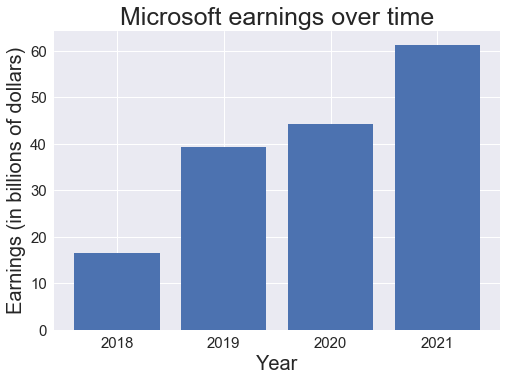

In [5]:
earnings = msft.earnings
earnings = earnings.reset_index()
earnings["Earnings (billions)"] = earnings["Earnings"]/1000000000
print(earnings)
print(type(earnings))
plt.bar(x=earnings["Year"], height = earnings["Earnings (billions)"], data = earnings)
plt.xticks([2018,2019,2020, 2021], fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Earnings (in billions of dollars)", fontsize=20)
plt.title("Microsoft earnings over time", fontsize=25)
plt.show()


Next, we have the **financials** attribute. This gives you more information on the underlying nature of the cash flows (expenditures on R&D, income before tax, after tax, different expenses included, ...)

In [6]:
print(msft.financials)

                                         2021-06-30   2020-06-30   2019-06-30  \
Research Development                     2.0716e+10   1.9269e+10   1.6876e+10   
Effect Of Accounting Charges                   None         None         None   
Income Before Tax                        7.1102e+10   5.3036e+10   4.3688e+10   
Minority Interest                              None         None         None   
Net Income                               6.1271e+10   4.4281e+10    3.924e+10   
Selling General Administrative           2.5224e+10   2.4523e+10   2.3098e+10   
Gross Profit                            1.15856e+11   9.6937e+10   8.2933e+10   
Ebit                                     6.9916e+10   5.3145e+10   4.2959e+10   
Operating Income                         6.9916e+10   5.3145e+10   4.2959e+10   
Other Operating Expenses                       None         None         None   
Interest Expense                          -2.33e+09   -2.591e+09   -2.686e+09   
Extraordinary Items         

Additionally, many of these metrics also exist in a quarterly time frame. We have quarterly_earnings, quarterly_financials, ...

#### 2.1.2 Technical data metrics

The first technical metric I'll look at is the stock **history**. This contains the evolution of stock prices at opening and closing of the stock market. It also contains the low and high values of the stock at that day, the number of stocks, dividends and stock splits of that day. (Stock splits are corporate actions, where the company divides each stock into two at half the price. Companies do this to prevent their ndividual stock price to be too high to be traded efficiently. It might also improve the stock price as a whole). Here, we can see that the stock price of Microsoft at close has increased 20x approximately

        Date       Open       High        Low      Close    Volume  Dividends  \
0 2002-12-31  16.647953  16.726869  16.180774  16.319666  58208800        0.0   
1 2003-01-02  16.509059  16.966768  16.322819  16.957298  67025200        0.0   
2 2003-01-03  16.916264  16.982553  16.692146  16.979397  55546800        0.0   
3 2003-01-06  17.051993  17.433942  16.982547  17.288738  59456200        0.0   
4 2003-01-07  17.336089  17.680159  17.260331  17.613871  80517400        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


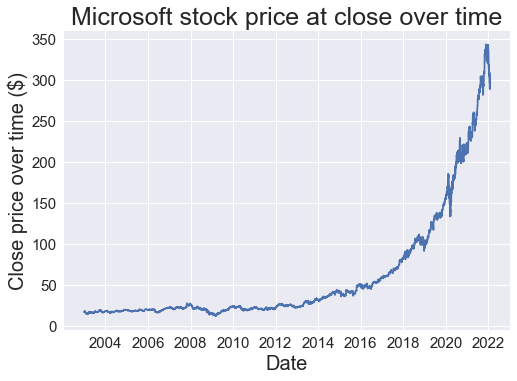

In [7]:
today = datetime.now().date().strftime("%Y-%m-%d")
stock_history= msft.history(start="2003-01-01", end=today)
stock_history = stock_history.reset_index()
print(stock_history.head())
plt.plot(stock_history["Date"], stock_history["Close"])
plt.ylabel("Close price over time ($)", fontsize=20)
plt.xlabel("Date", fontsize=20)
plt.title("Microsoft stock price at close over time", fontsize=25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize=15)
plt.show()


Much of the more important metrics of history are also separately accessible for convenience. One of these is the **dividends**. Companies can choose to give part of their profit to the shareholders as dividends. However, if a company keeps and reinvests the money, it still technically belongs to the shareholders, so a generous dividend strategy is not so important as it first seems and might be harmful due to tax reasons. Nevertheless, dividends are part of the return on a stock and have to be monitored. In the case of Microsoft, we see a steadily increasing dividend from 0.24 dollar per stock to 2.3 dollar per stock per year, with one outlier.

         Date  Dividends  Year
0  2003-12-31       0.24  2003
1  2004-12-31       3.16  2004
2  2005-12-31       0.32  2005
3  2006-12-31       0.37  2006
4  2007-12-31       0.41  2007
5  2008-12-31       0.46  2008
6  2009-12-31       0.52  2009
7  2010-12-31       0.55  2010
8  2011-12-31       0.68  2011
9  2012-12-31       0.83  2012
10 2013-12-31       0.97  2013
11 2014-12-31       1.15  2014
12 2015-12-31       1.29  2015
13 2016-12-31       1.47  2016
14 2017-12-31       1.59  2017
15 2018-12-31       1.72  2018
16 2019-12-31       1.89  2019
17 2020-12-31       2.09  2020
18 2021-12-31       2.30  2021


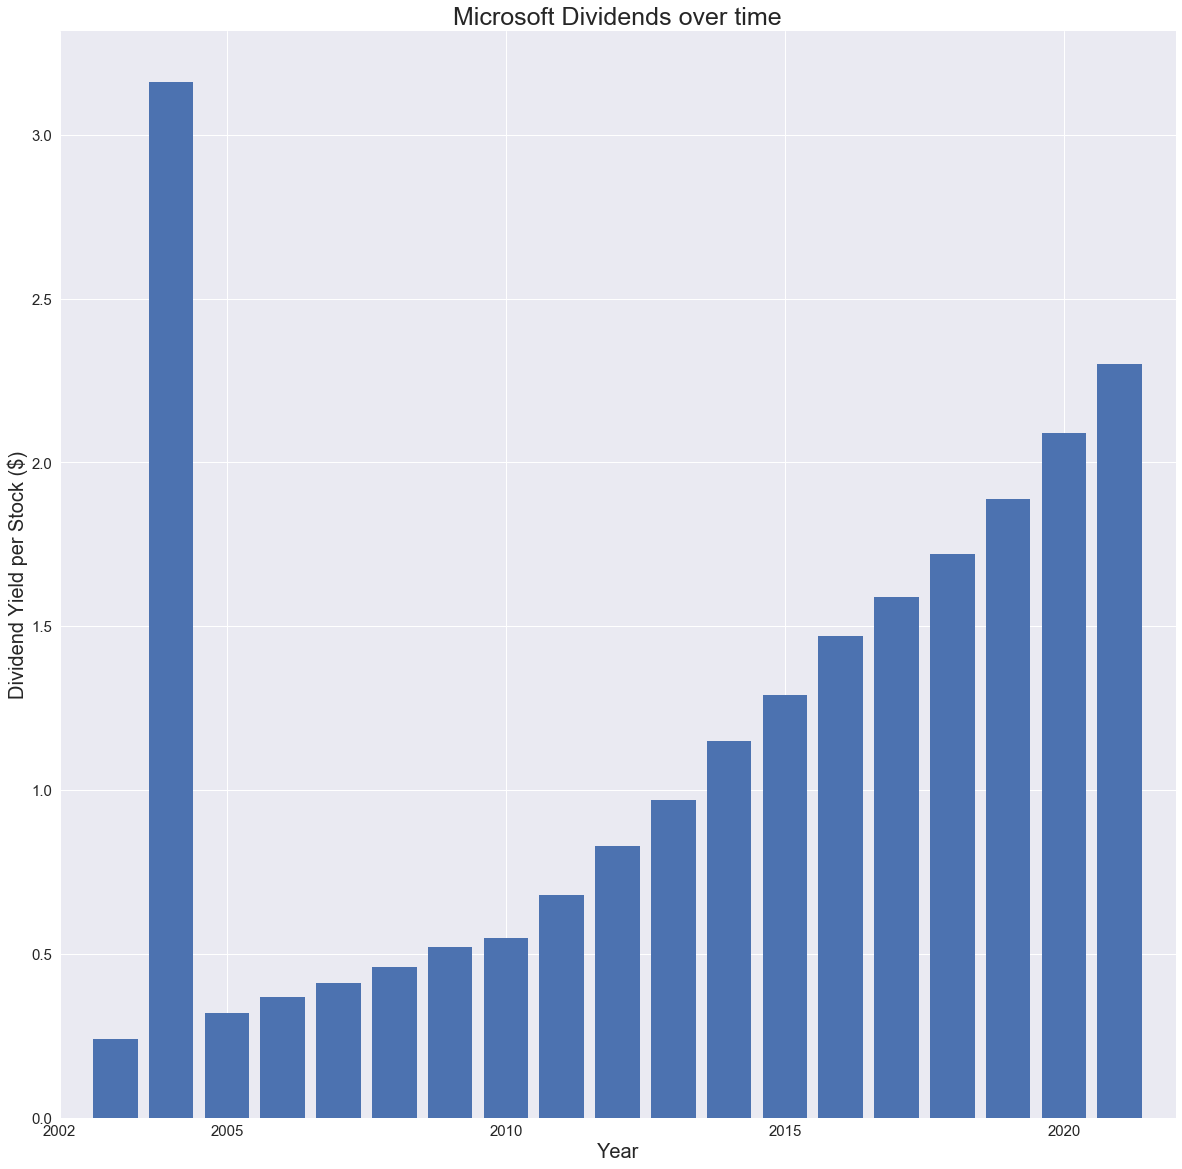

In [8]:
plt.rcParams["figure.figsize"]=20,20
dividends = msft.dividends
dividends = dividends.resample('Y').sum()
dividends = dividends.reset_index()
dividends["Year"] = dividends["Date"].dt.year
print(dividends)
plt.bar(dividends["Year"], dividends["Dividends"])
plt.ylabel("Dividend Yield per Stock ($)", fontsize=20)
plt.xlabel("Year", fontsize=20)
plt.title("Microsoft Dividends over time", fontsize=25)
plt.xlim(2002, 2022)
plt.xticks([2002, 2005, 2010, 2015, 2020], fontsize = 15)
plt.yticks(fontsize=15)
plt.show()

Similarly, the number of shares and splits can be obtained as well.

In [9]:
print(msft.shares)
print(msft.splits)


      BasicShares
Year             
2018   7700000000
2019   7673000000
2020   7610000000
2021   7547000000
Date
2003-02-18    2.0
Name: Stock Splits, dtype: float64


Using the third set of attributes, I can show who is holding Microsoft stock at this point in time. This is done using the **'institutional_holders', 'major_holders', 'mutualfund_holders'** attributes. We can see that Index funds, who typically buy stocks of the biggest companies at that point in time, are major shareholders of Microsoft as expected.

In [10]:
print(msft.institutional_holders)


                              Holder     Shares Date Reported   % Out  \
0         Vanguard Group, Inc. (The)  613781686    2021-09-29  0.0818   
1                     Blackrock Inc.  507117032    2021-09-29  0.0675   
2           State Street Corporation  294432926    2021-09-29  0.0392   
3                           FMR, LLC  215731468    2021-09-29  0.0287   
4      Price (T.Rowe) Associates Inc  197579453    2021-09-29  0.0263   
5      Geode Capital Management, LLC  126079812    2021-09-29  0.0168   
6            Capital World Investors  110359787    2021-09-29  0.0147   
7  Capital Research Global Investors   94282634    2021-09-29  0.0126   
8    Capital International Investors   91901445    2021-09-29  0.0122   
9         Northern Trust Corporation   89592127    2021-09-29  0.0119   

          Value  
0  173037332917  
1  142966433661  
2   83006530497  
3   60819015458  
4   55701599389  
5   35544420599  
6   31112631151  
7   26580160177  
8   25908855374  
9   25257812443 

In [11]:
print(msft.major_holders)

        0                                      1
0   0.06%        % of Shares Held by All Insider
1  71.97%       % of Shares Held by Institutions
2  72.01%        % of Float Held by Institutions
3    5431  Number of Institutions Holding Shares


In [12]:
print(msft.mutualfund_holders)

                                              Holder     Shares Date Reported  \
0             Vanguard Total Stock Market Index Fund  212378335    2021-09-29   
1                            Vanguard 500 Index Fund  157812389    2021-09-29   
2                             SPDR S&P 500 ETF Trust   80845340    2021-11-29   
3                            Fidelity 500 Index Fund   73329365    2021-11-29   
4        Invesco ETF Tr-Invesco QQQ Tr, Series 1 ETF   67174528    2021-11-29   
5                           iShares Core S&P 500 ETF   60678962    2021-10-30   
6                         Vanguard Growth Index Fund   59312522    2021-09-29   
7  Vanguard Institutional Index Fund-Institutiona...   57658777    2021-09-29   
8                         Growth Fund Of America Inc   54693909    2021-09-29   
9         Vanguard Information Technology Index Fund   33363368    2021-08-30   

    % Out        Value  
0  0.0283  59873700203  
1  0.0210  44490468706  
2  0.0108  26726660950  
3  0.009

Finally, we have some access to social appraisals of the stock. The first is the **sustainability** attribute. This contains information on how well the company scores on how "morally good" it is. This is best understood from the example below.

In [13]:
print(msft.sustainability)

                                     Value
2021-9                                    
palmOil                              False
controversialWeapons                 False
gambling                             False
socialScore                           8.06
nuclear                              False
furLeather                           False
alcoholic                            False
gmo                                  False
catholic                             False
socialPercentile                      None
peerCount                               99
governanceScore                       4.73
environmentPercentile                 None
animalTesting                        False
tobacco                              False
totalEsg                             13.26
highestControversy                       3
esgPerformance                  UNDER_PERF
coal                                 False
pesticides                           False
adult                                False
percentile 

The second attribute is the **recommendations** attribute. This attribute contains information on professional attribute appraisals.

In [14]:
print(msft.recommendations)

                               Firm       To Grade From Grade Action
Date                                                                
2012-03-16 08:19:00  Argus Research            Buy                up
2012-03-19 14:00:00  Hilliard Lyons  Long-Term Buy              main
2012-03-22 07:03:00  Morgan Stanley     Overweight              main
2012-04-03 11:53:00             UBS            Buy              main
2012-04-20 06:18:00   Deutsche Bank            Buy              main
...                             ...            ...        ...    ...
2022-01-03 20:23:49         Keybanc     Overweight              main
2022-01-26 14:06:23     BMO Capital     Outperform              main
2022-01-26 14:42:40     Oppenheimer     Outperform              main
2022-01-26 15:03:00  Morgan Stanley     Overweight              main
2022-01-26 15:06:01       Citigroup            Buy              main

[365 rows x 4 columns]


Finally, the **info** attribute returns all kinds of useful information about the stock.

In [15]:
print(msft.info)

{'zip': '98052-6399', 'sector': 'Technology', 'fullTimeEmployees': 181000, 'longBusinessSummary': 'Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. Its Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, and Skype for Business, as well as related Client Access Licenses (CAL); Skype, Outlook.com, OneDrive, and LinkedIn; and Dynamics 365, a set of cloud-based and on-premises business solutions for organizations and enterprise divisions. Its Intelligent Cloud segment licenses SQL, Windows Servers, Visual Studio, System Center, and related CALs; GitHub that provides a collaboration platform and code hosting service for developers; and Azure, a cloud platform. It also offers support services and Microsoft consulting services to assist customers in developing, deploying, and managing Microsoft server and desktop solutions; and training and certificatio

In the next section, I'll explore how to use this information to find interesting and undervalued stocks.

**Source:** For more information on how to retrieve financial data, check out the following videos:
1. https://www.youtube.com/watch?v=9nB__kJio-M
2. https://www.youtube.com/watch?v=NnE1KVhSyzw


### 2.2 Fundamental data metrics: Is Microsoft a financially healthy company?

#### 2.2.1 Liquidity ratio's

**Liquidity** ratio's answer the following question: **To what extent is a company capable of paying of its debts in the short term?**

This is really important, since if a company can't pay off its short-term debts, it will go bankrupt, even if the company is financially viable on the whole or has a great product. The first ratio used for this analysis is the **current ratio**, which is defined as the current assets divided by current liabilities. This information is found in the balancesheet.

        Date  Current Ratio  Year
0 2021-06-30       2.079994  2021
1 2020-06-30       2.515765  2020
2 2019-06-30       2.528839  2019
3 2018-06-30       2.900800  2018
<class 'pandas.core.frame.DataFrame'>


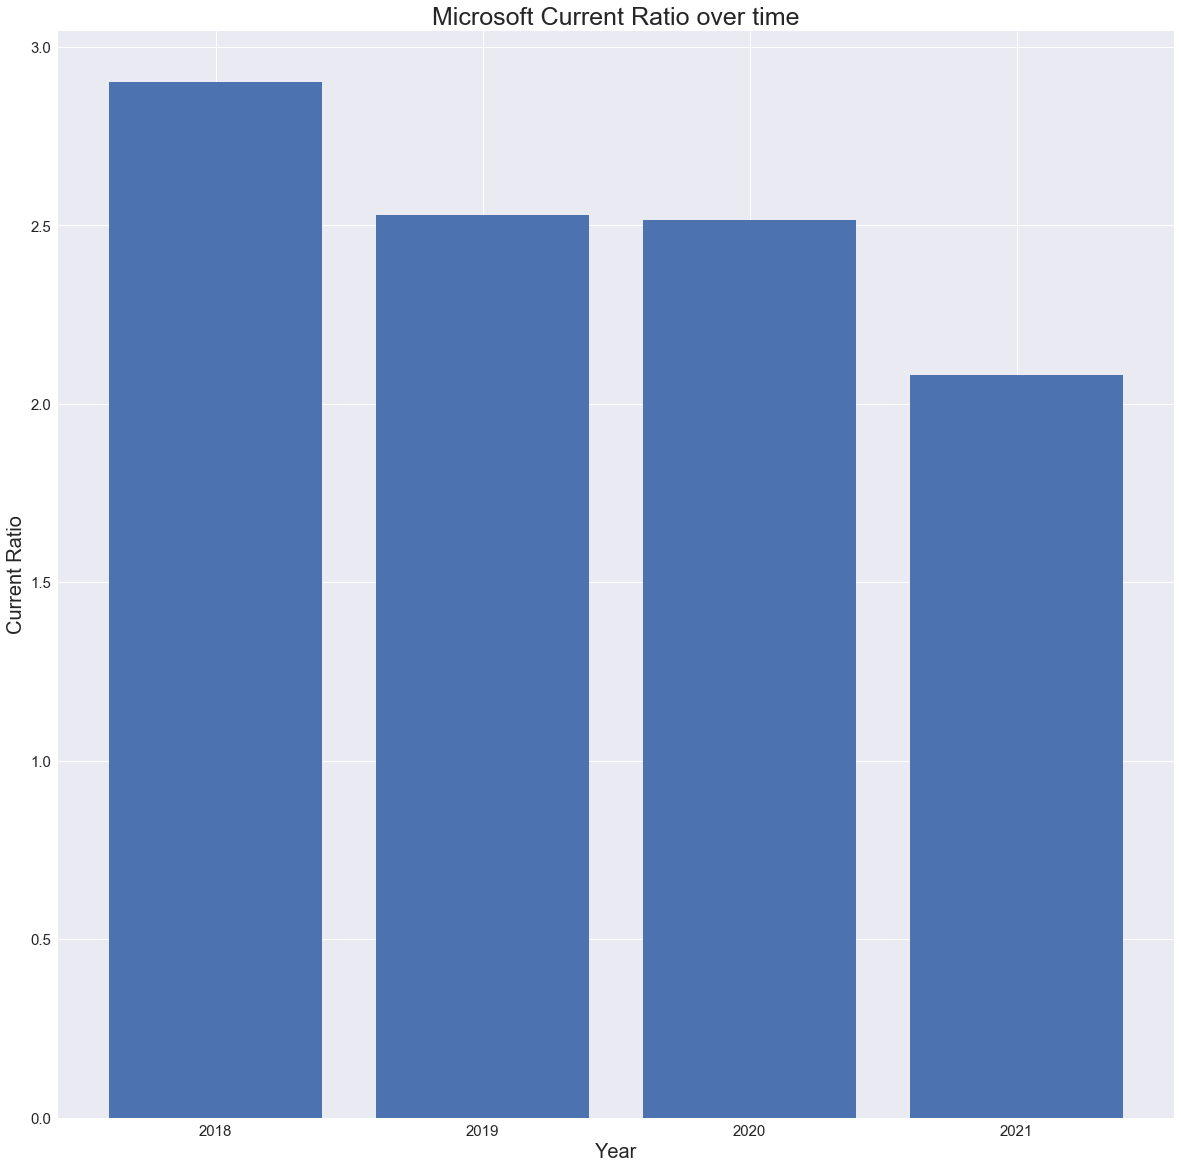

In [16]:
balance_sheet = msft.balancesheet
current_assets = balance_sheet.loc["Total Current Assets", :]
current_liabilities = balance_sheet.loc["Total Current Liabilities", :]
current_ratio = current_assets/current_liabilities
current_ratio = current_ratio.reset_index()
current_ratio.columns = ["Date", "Current Ratio"]
current_ratio["Year"] = current_ratio["Date"].dt.year
print(current_ratio)
print(type(current_ratio))
plt.bar(current_ratio["Year"], current_ratio["Current Ratio"])
plt.ylabel("Current Ratio", fontsize=20)
plt.xlabel("Year", fontsize=20)
plt.title("Microsoft Current Ratio over time", fontsize=25)
plt.xticks([2018, 2019, 2020, 2021], fontsize = 15)
plt.yticks(fontsize=15)
plt.show()


As you can see above, Microsoft has always maintained 2-3 times more current assests than current liabilities. It should therefore have no problems to deal with short term debts. However, another problem of liquidity might arise if the company has stored most of its assets as inventory and can't sell that off fast enough. To take this into account, we make a slight correction to the current ratio and obtain the **quick ratio**, defined as total assets minus inventory divided by total liabilities. Let's calculate this:

        Date  Quick Ratio  Year
0 2021-06-30     2.050261  2021
1 2020-06-30     2.489559  2020
2 2019-06-30     2.499121  2019
3 2018-06-30     2.855287  2018
<class 'pandas.core.frame.DataFrame'>


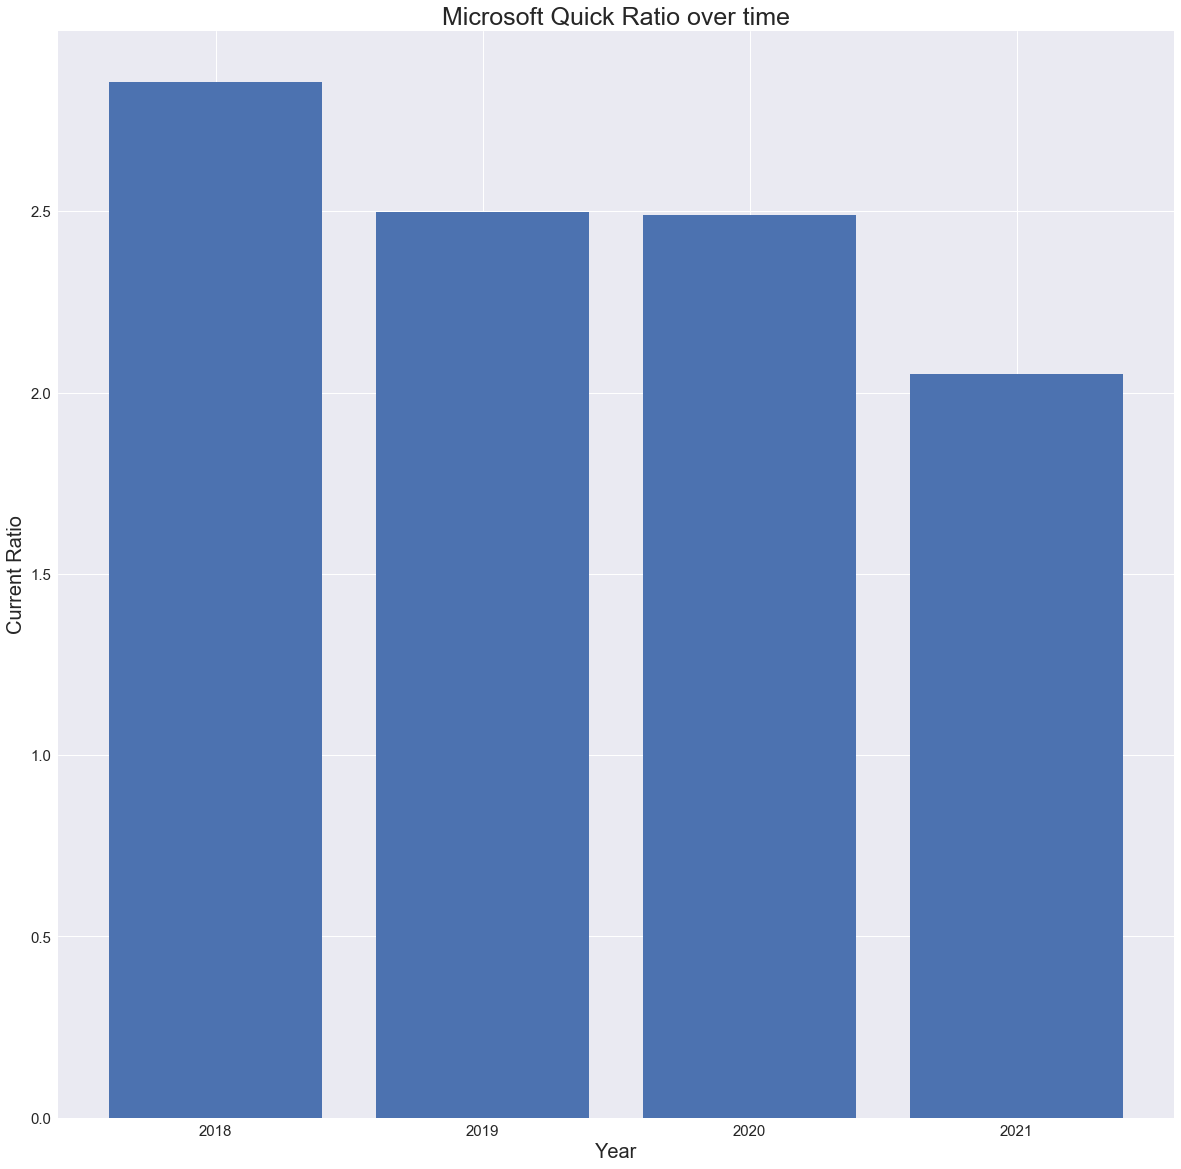

In [17]:
inventory = balance_sheet.loc["Inventory", :]
quick_ratio = (current_assets-inventory)/current_liabilities
quick_ratio = quick_ratio.reset_index()
quick_ratio.columns = ["Date", "Quick Ratio"]
quick_ratio["Year"] = quick_ratio["Date"].dt.year
print(quick_ratio)
print(type(quick_ratio))
plt.bar(quick_ratio["Year"], quick_ratio["Quick Ratio"])
plt.ylabel("Current Ratio", fontsize=20)
plt.xlabel("Year", fontsize=20)
plt.title("Microsoft Quick Ratio over time", fontsize=25)
plt.xticks([2018, 2019, 2020, 2021], fontsize = 15)
plt.yticks(fontsize=15)
plt.show()

As we can see, the inventory has nearly no impact on Microsoft's liquidity, since the current and quick ratio's are nearly identical. This is not surprising, since Microsoft is mainly a software company. I conclude that Microsoft has never had a liquidity problem during the last 4 years.

#### 2.2.2 Solvability ratio's

**Solvability** ratio's answer the following question: **To what extent is a company capable of paying of its debts in the long term?** In other words, is the company financially viable?

The first solvability metric is the total liabilities to total asset ratio (**debt ratio**). If this exceeds 1, the company has more debt than what they own. Let's calculate this:

        Date  Debt Ratio  Year
0 2021-06-30    0.574605  2021
1 2020-06-30    0.607369  2020
2 2019-06-30    0.642897  2019
3 2018-06-30    0.680438  2018
<class 'pandas.core.frame.DataFrame'>


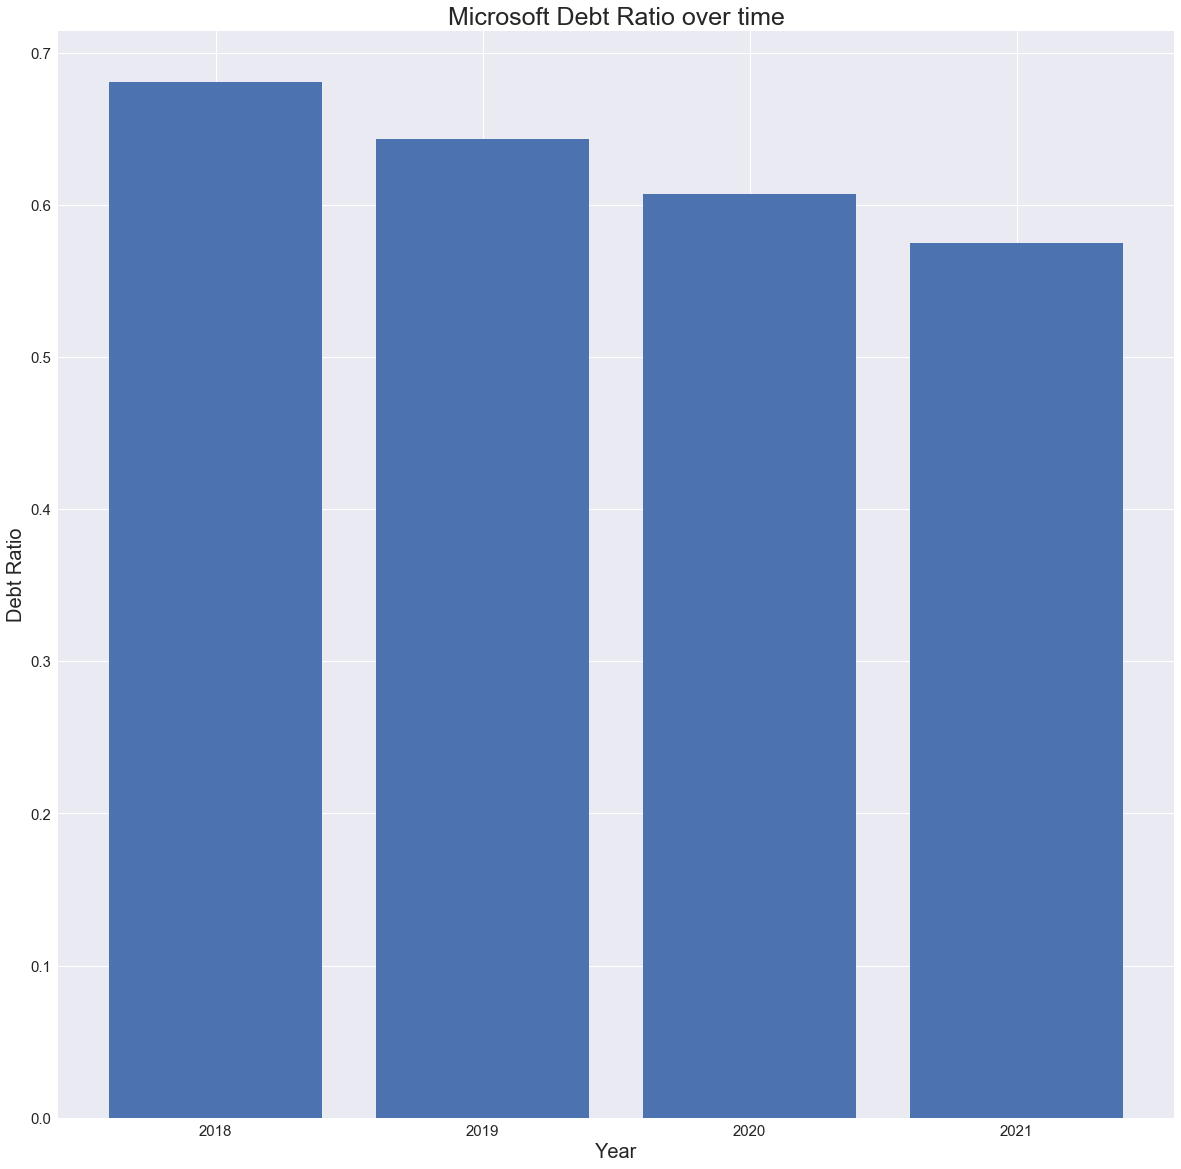

In [18]:
total_assets = balance_sheet.loc["Total Assets", :]
total_liabilities = balance_sheet.loc["Total Liab", :]
debt_ratio = total_liabilities/total_assets
debt_ratio = debt_ratio.reset_index()
debt_ratio.columns = ["Date", "Debt Ratio"]
debt_ratio["Year"] = debt_ratio["Date"].dt.year
print(debt_ratio)
print(type(debt_ratio))
plt.bar(debt_ratio["Year"], debt_ratio["Debt Ratio"])
plt.ylabel("Debt Ratio", fontsize=20)
plt.xlabel("Year", fontsize=20)
plt.title("Microsoft Debt Ratio over time", fontsize=25)
plt.xticks([2018, 2019, 2020, 2021], fontsize = 15)
plt.yticks(fontsize=15)
plt.show()

As we can see, the debt ratio is comfortably below one and decreasing over the last years. Debt is also not necessarily a bad thing, if the company uses it to fund future growth opportunities.

Another important metric to measure is the **Cash flow Coverage**. This quantifies how much money the company is making versus their total debt and their ability to pay it off. It is defined as the operational cash flow versus the total liabilities. Let's calculate this:


2021-06-30    0.400123
2020-06-30    0.331545
2019-06-30    0.283266
2018-06-30    0.249157
dtype: float64
        Date  Cash flow coverage  Year
0 2021-06-30            0.400123  2021
1 2020-06-30            0.331545  2020
2 2019-06-30            0.283266  2019
3 2018-06-30            0.249157  2018
<class 'pandas.core.frame.DataFrame'>


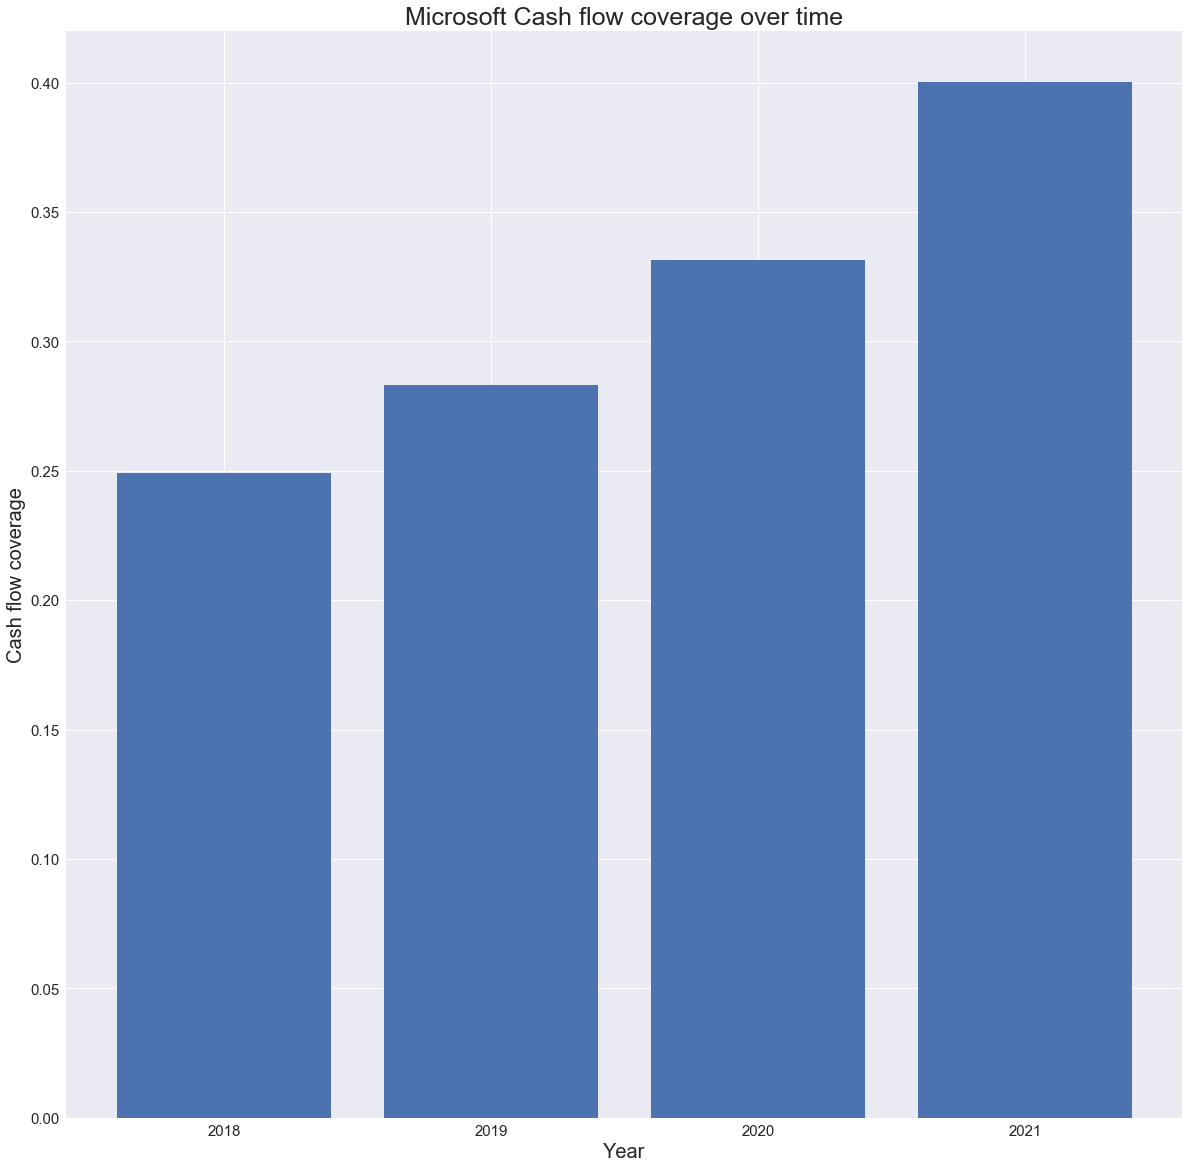

In [19]:
cashflow = msft.cashflow
operational_cashflow = cashflow.loc["Total Cash From Operating Activities", :]
CFC = operational_cashflow/total_liabilities
print(CFC)
CFC = CFC.reset_index()
CFC.columns = ["Date", "Cash flow coverage"]
CFC["Year"] = CFC["Date"].dt.year
print(CFC)
print(type(CFC))
plt.bar(CFC["Year"], CFC["Cash flow coverage"])
plt.ylabel("Cash flow coverage", fontsize=20)
plt.xlabel("Year", fontsize=20)
plt.title("Microsoft Cash flow coverage over time", fontsize=25)
plt.xticks([2018, 2019, 2020, 2021], fontsize = 15)
plt.yticks(fontsize=15)
plt.show()


From this, we can see that Microsoft's coverage has improved over the years to the point that it could pay off all its debts with just 2-3 years of income. 

Other important points to check are whether the company's cashflow can cover the interest it has to pay on its debts. This is called the **interest coverage ratio**. It is calculated using the EBIT (Earnings before Income and Taxes) divided by the Interest Expense. At present, I don't know how to get this from the data I have so far. Related to this is an analysis on how the debt payments are spread out in time **debt maturity profile**. For instance, Microsoft's cash flow coverage looks very good, but if it has to pay ALL of its debts tomorrow, it will have big problems. I will nevertheless assume that this debt management was done intelligently and conclude that Microsoft has no solvability issues that I can see.

#### 2.2.3 Profitability ratio's

Good companies also return a profit on top of being financially viable. This is reflected by **profitability** ratios. Profit is either compared to the company's capital (**Return on Capital or ROC**) or to the company's assets (**Return on Assets or ROA**) or on the company's equity (company's own money without debt) (**Return on Equity or ROE**). These numbers are easy to manipulate (i.e. reducing capital, equity or assets will increase the ratio's), so it is important to first ascertain that the company has enough capital, assets and equity to be financially healthy. Let's calculate these:

         Earnings
Year             
2018  16571000000
2019  39240000000
2020  44281000000
2021  61271000000
      Total Assets
Year              
2018  2.588480e+11
2019  2.865560e+11
2020  3.013110e+11
2021  3.337790e+11
   Year  Return on Assets
0  2018          0.064018
1  2019          0.136937
2  2020          0.146961
3  2021          0.183568


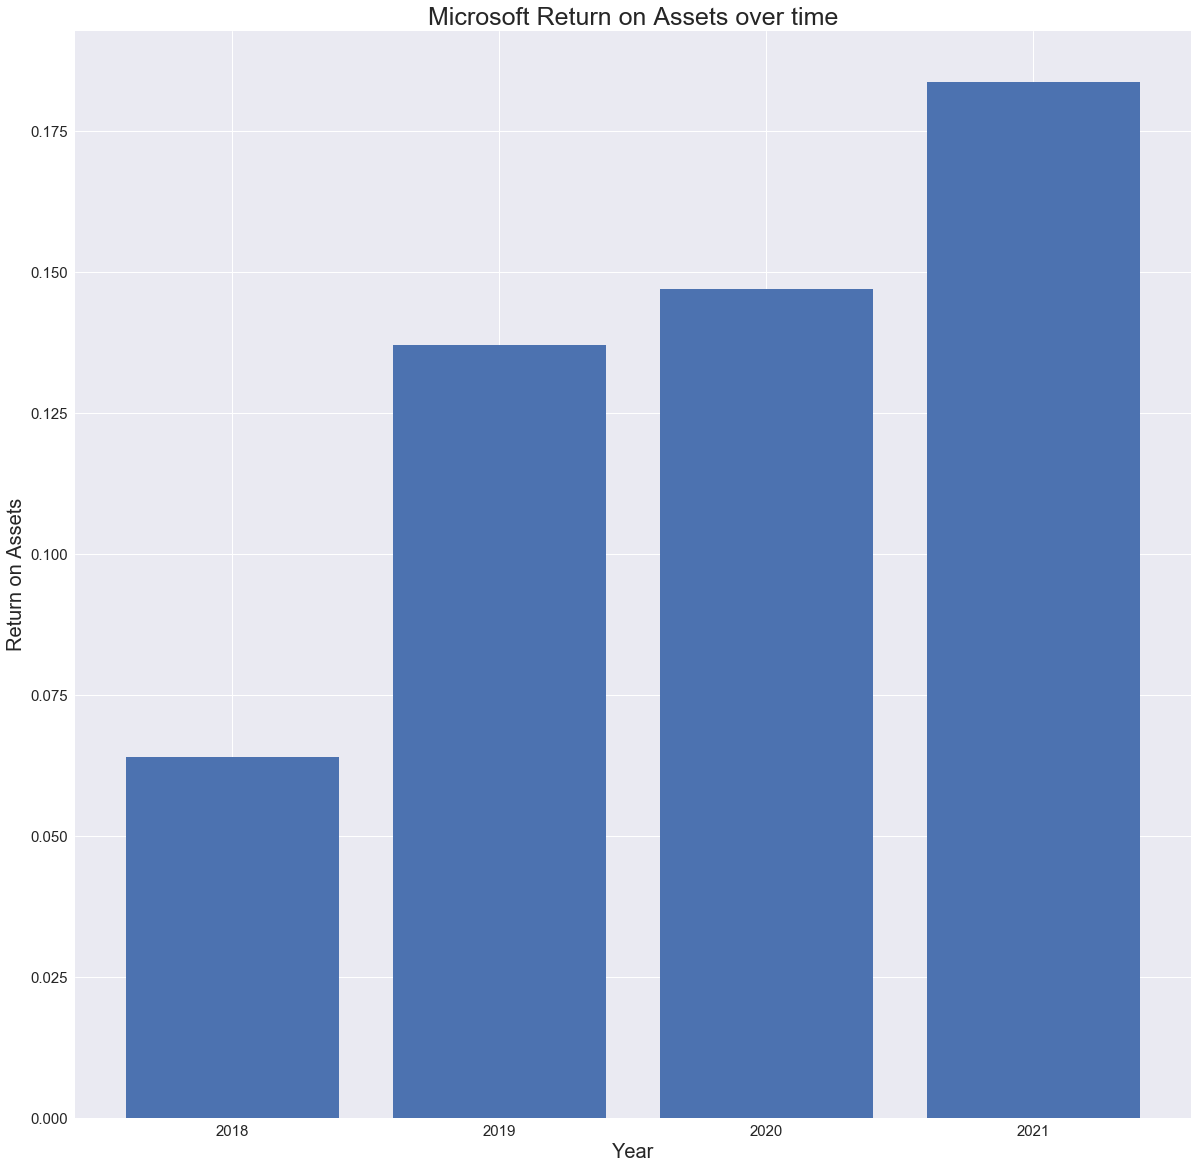

In [20]:
profit = msft.earnings
profit = profit.drop(["Revenue"], axis = 1)


total_assets_Y = total_assets.reset_index()
total_assets_Y.columns = ["Date", "Total Assets"]
total_assets_Y["Year"] = total_assets_Y["Date"].dt.year
total_assets_Y = total_assets_Y.drop(["Date"], axis = 1)
total_assets_Y = total_assets_Y.sort_values(by = "Year")
total_assets_Y = total_assets_Y.set_index("Year")


print(profit)
print(total_assets_Y)

roa = profit["Earnings"]/total_assets_Y["Total Assets"]
roa = roa.reset_index()
roa.columns = ["Year", "Return on Assets"]
print(roa)
 
plt.bar(roa["Year"], roa["Return on Assets"])
plt.ylabel("Return on Assets", fontsize=20)
plt.xlabel("Year", fontsize=20)
plt.title("Microsoft Return on Assets over time", fontsize=25)
plt.xticks([2018, 2019, 2020, 2021], fontsize = 15)
plt.yticks(fontsize=15)
plt.show()


Let's also look at the ROE.

         Earnings
Year             
2018  16571000000
2019  39240000000
2020  44281000000
2021  61271000000
      Total Stockholder Equity
Year                          
2018              8.271800e+10
2019              1.023300e+11
2020              1.183040e+11
2021              1.419880e+11
   Year  Return on Equity
0  2018          0.200331
1  2019          0.383465
2  2020          0.374298
3  2021          0.431522


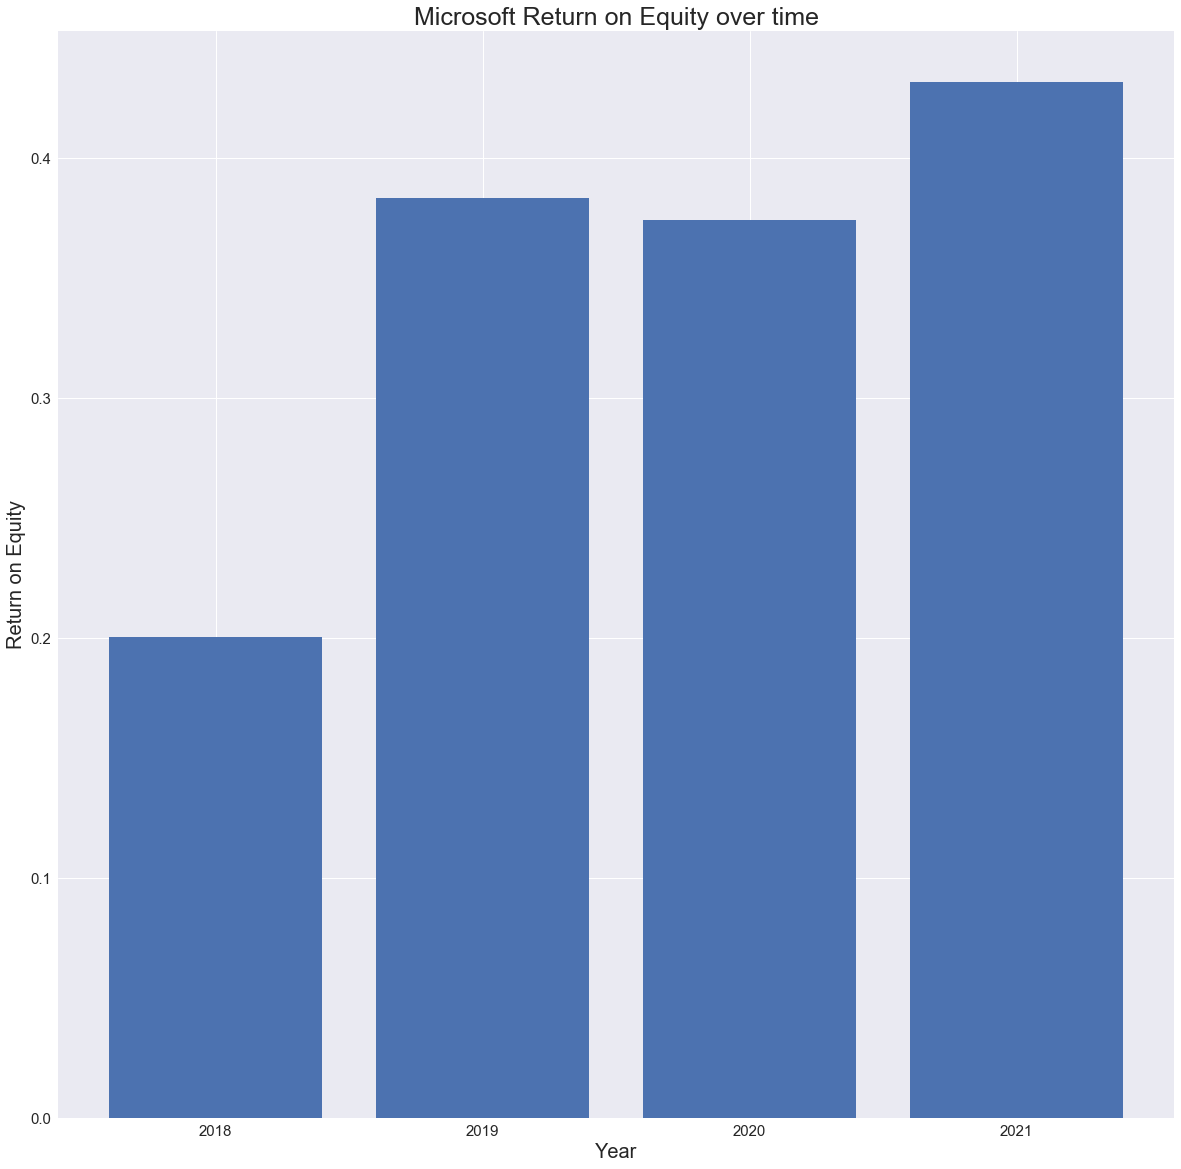

In [21]:
print(profit)
equity = balance_sheet.loc["Total Stockholder Equity", :]
equity = equity.reset_index()
equity.columns = ["Date", "Total Stockholder Equity"]
equity["Year"] = equity["Date"].dt.year
equity = equity.drop(["Date"], axis = 1)
equity = equity.sort_values(by = "Year")
equity = equity.set_index("Year")
print(equity)

roe = profit["Earnings"]/equity["Total Stockholder Equity"]
roe = roe.reset_index()
roe.columns = ["Year", "Return on Equity"]
print(roe)
 
plt.bar(roe["Year"], roe["Return on Equity"])
plt.ylabel("Return on Equity", fontsize=20)
plt.xlabel("Year", fontsize=20)
plt.title("Microsoft Return on Equity over time", fontsize=25)
plt.xticks([2018, 2019, 2020, 2021], fontsize = 15)
plt.yticks(fontsize=15)
plt.show()

From these calculations, we can conclude that Microsoft generated pretty substantial profits, especially after 2018. This is true whether you look at their return on  assets or at the value they have created for their stockholders. Combined with the previous analyses, I conclude that Microsoft is a financially viable company that can manage both short and long debts and that generates an impressive profit for its shareholders.

#### 2.2.4 Fundamental stock valuation

While I have established that Microsoft is a good company from a financial point of view, it is still possible that Microsoft's stock price is too high relative to its financial record. For the sake of time, I will not dive into this too deep here and only limit myself to some of the more simple ones. I'll look at the **Price over Earnings ratio (PE)**. This is calculated by dividing the value of the company on the stock market (stock price * number_of_stocks) by the earnings of the company. Historically, the average of these ratios is 16, suggesting that a company with a ratio higher then 16 is overpriced. Let's calculate this:

         Earnings
Year             
2018  16571000000
2019  39240000000
2020  44281000000
2021  61271000000
      Close Price    # Shares    Market_Cap
Year                                       
2018    96.921814  7700000000  7.462980e+11
2019   127.115490  7673000000  9.753572e+11
2020   190.485097  7610000000  1.449592e+12
2021   274.945418  7547000000  2.075013e+12
   Year  Price-to-Earnings ratio
0  2018                45.036387
1  2019                24.856197
2  2020                32.736198
3  2021                33.866153


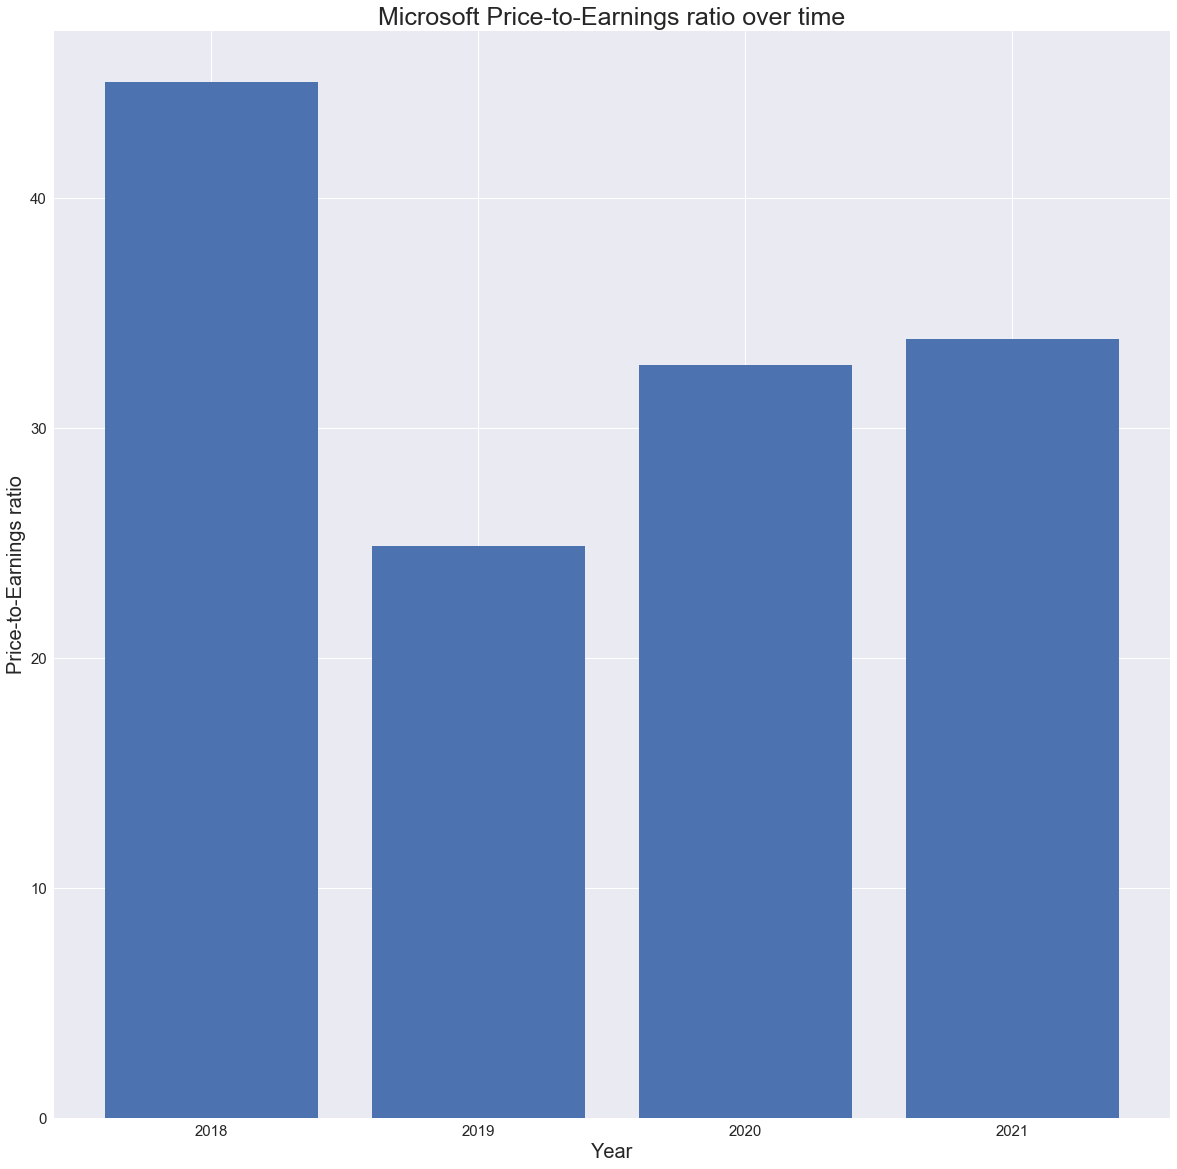

In [22]:
print(profit)
fundamental_start_date = datetime.strptime("2017-12-31", "%Y-%m-%d")
fundamental_end_date = datetime.strptime("2022-01-01", "%Y-%m-%d")
stock_history_Red = stock_history[(stock_history["Date"] > fundamental_start_date) & (stock_history["Date"] < fundamental_end_date) ]
stock_history_Red = stock_history_Red.set_index("Date")
stock_history_Red = stock_history_Red.resample("Y").mean()
stock_history_Red = stock_history_Red["Close"]
stock_history_Red = stock_history_Red.reset_index()
stock_history_Red.columns = ["Date", "Close Price"]
stock_history_Red["Year"] = stock_history_Red["Date"].dt.year
stock_history_Red = stock_history_Red.drop(["Date"], axis = 1)
stock_history_Red = stock_history_Red.sort_values(by = "Year")
stock_history_Red = stock_history_Red.set_index("Year")
stock_history_Red["# Shares"] = msft._shares
stock_history_Red["Market_Cap"] = stock_history_Red["# Shares"] * stock_history_Red["Close Price"]
print(stock_history_Red.head())
pe = stock_history_Red["Market_Cap"]/profit["Earnings"]
pe = pe.reset_index()
pe.columns = ["Year", "Price-to-Earnings ratio"]
print(pe)
 
plt.bar(pe["Year"], pe["Price-to-Earnings ratio"])
plt.ylabel("Price-to-Earnings ratio", fontsize=20)
plt.xlabel("Year", fontsize=20)
plt.title("Microsoft Price-to-Earnings ratio over time", fontsize=25)
plt.xticks([2018, 2019, 2020, 2021], fontsize = 15)
plt.yticks(fontsize=15)
plt.show()



From this analysis, we can see that Microsoft is appraised too high, relative to its financials alone. This is a common situation for tech companies nowadays, since investors also take into account other less tangible things, such as faith in the sector, faith in management, expected growth based on sector and many more. Another reason for this overvaluation is index funds, who buy the biggest companies in their index and increase demand. If we want to know whether this appraisal is correct, we would need to compare these numbers to other companies in the same sector, as well as find the reasons why investors value Microsoft more than they should based on financials alone. Then we may decide to agree or disagree with that and buy based on that. I'll try to objectify these considerations in part 3, but for now, I'll assume that the investors are right and that this price for Microsoft stock is correct. This assumption is also called the **efficient market hypothesis** and underpins the technical analysis of the next section.

**Source:** For this part, I've used the course I'm doing on investing for beginners as well as the brilliantly explained entries on fundamental ratios on investopedia: https://www.investopedia.com/

### 2.3 Technical analysis: Is the Microsoft stock currently undervalued and when should we buy it?

#### 2.3.1 Basic assumptions of Technical Analysis

In the previous section, I've looked at several fundamental indicators to see whether Microsoft is a financially viable company that generates profit, based on information from the balance sheet and cash flow. I've also commented on how the stock price relates to a notion of the fundamental value of the company (P/E ratio) and pointed out that Microsoft stock seems overpriced based on the financial information alone. This does not mean that the stock price is unjustified as investors might take many other things into account. In fact, for technical analysis, we adopt the **efficient market hypothesis**, which states that all relevant information on a stock is correctly embedded in its price or to put it another way, that the current price is always right. It enables us to assume that we only need the evolution of the stock price to identify good buying moments (when the stock price is trending upwards) and predict future stock prices.

#### 2.3.2 Trend following:Moving averages and Bollinger bands

A first simple strategy is to buy when the Microsoft stock is trending upwards and to sell when it starts trending downwards. A conceptually very simple way to do this is by comparing long and short term moving averages e.g. the average price of Microsoft stock during the last 50 days versus during the last 20 days. If the latter is greater, I assume an upward trend of the stock. First, I'll get the full stock information for Microsoft and plot it.

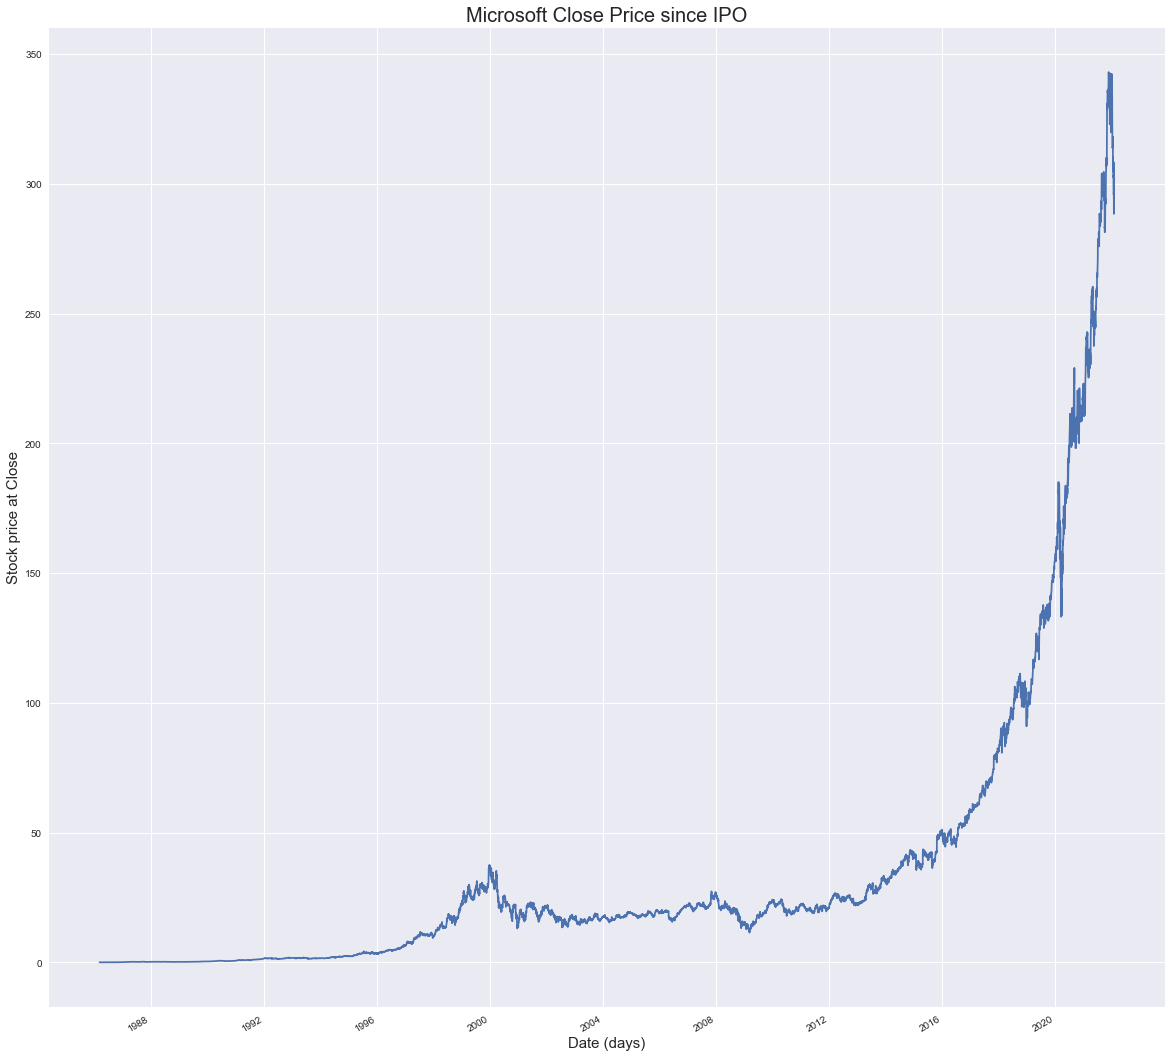

In [23]:
total_history = msft.history(period="Max")
total_history["Close"].plot(use_index=True)
plt.title("Microsoft Close Price since IPO", fontsize = 20)
plt.xlabel("Date (days)", fontsize = 15)
plt.ylabel("Stock price at Close", fontsize = 15)
plt.show()

This graph already shows some interesting trends.
1. There was a small peak at the year 2000 and a decade of comparatively weak growth. This is likely after the dotcom crisis, where many tech companies struggled.
2. Microsoft's stock price started to explode from 2012 onwards, resulting in seemingly exponential growth.
3. Recently, the stock of Microsoft has fallen a bit. This is likely the result of their recent plans of acquiring Activision Blizzard. This could be due to many things, such as decreased investor confidence because of the high price Microsoft will pay, anxiety that Microsoft will have to issue new stocks to pay for this deal (they don't need to), anxiety that Microsoft will become too big and run into antitrust issues or general shorting of parent companies during fusions (an effective trading strategy for reasons I won't go into now).

With this in mind, let's calculate medium (20 day) and longer(50 day) moving averages for the last 2000 days. Bollinger bands are moving standard deviations over the same period, multiplied by a constant depending on how long the time window is. Let's calc:

                Open      High       Low     Close      Volume  Dividends  \
Date                                                                        
1986-03-13  0.055898  0.064119  0.055898  0.061378  1031788800        0.0   
1986-03-14  0.061378  0.064667  0.061378  0.063570   308160000        0.0   
1986-03-17  0.063570  0.065215  0.063570  0.064667   133171200        0.0   
1986-03-18  0.064667  0.065215  0.062474  0.063022    67766400        0.0   
1986-03-19  0.063022  0.063570  0.061378  0.061926    47894400        0.0   

            Stock Splits  
Date                      
1986-03-13           0.0  
1986-03-14           0.0  
1986-03-17           0.0  
1986-03-18           0.0  
1986-03-19           0.0  


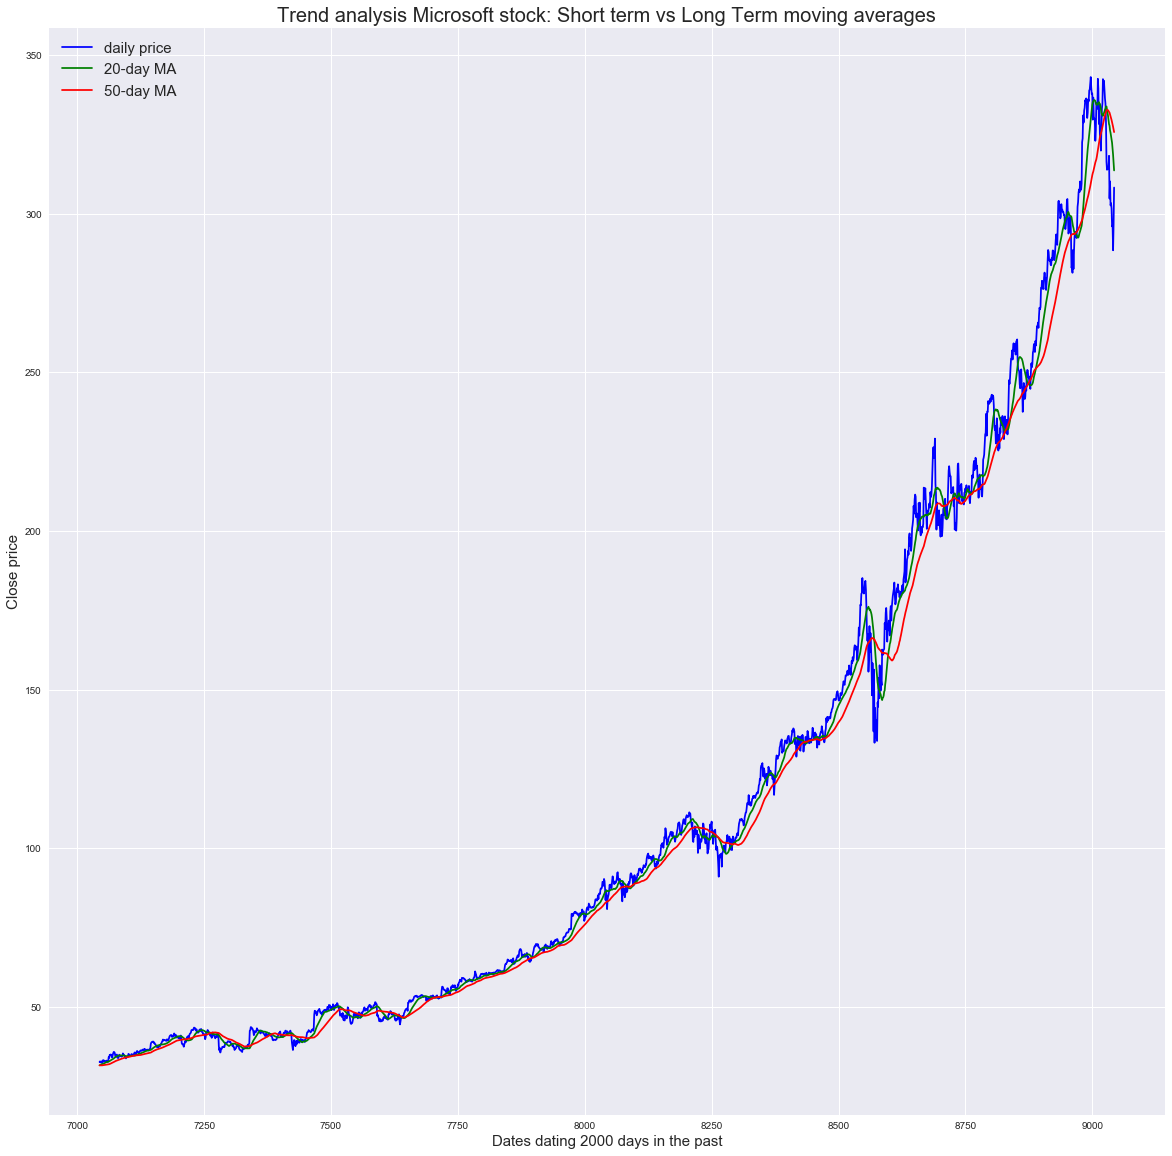

In [24]:
print(total_history.head())
vector_length = len(total_history["Close"])
mvavg_20s = []
upper_Bollinger_20s=[]
lower_Bollinger_20s=[]
mvavg_50s=[]
upper_Bollinger_50s=[]
lower_Bollinger_50s=[]
prices =[]
ind=[]
buy_or_sell=[]

for i in range(vector_length-2000, vector_length):
    ind.append(i)
    daily_price = total_history["Close"][i]
    prices.append(daily_price)
    price_20 =  total_history["Close"][i-20:i]
    
    mvavg_20 = price_20.mean()
    mvavg_20s.append(mvavg_20)
    
    upper_Bollinger_20 = mvavg_20 + 2* price_20.std()
    upper_Bollinger_20s.append(upper_Bollinger_20)
    
    lower_Bollinger_20 = mvavg_20 - 2*price_20.std()
    lower_Bollinger_20s.append(lower_Bollinger_20)
    
    price_50 =  total_history["Close"][i-50:i]
    mvavg_50 = price_50.mean()
    mvavg_50s.append(mvavg_50)
    
    upper_Bollinger_50 = mvavg_50 + 2.5* price_50.std()
    upper_Bollinger_50s.append(upper_Bollinger_50)
    
    lower_Bollinger_50 = mvavg_50 - 2*price_50.std()
    lower_Bollinger_50s.append(lower_Bollinger_50)
    
    if mvavg_20 > mvavg_50:
        buy_or_sell.append("Buy")
    elif mvavg_20 < mvavg_50:
        buy_or_sell.append("Sell")
    else:
        buy_or_sell.append("Hold")

plt.plot(ind, prices, color = "blue")        
plt.plot(ind, mvavg_20s, color = "green")
plt.plot(ind, mvavg_50s, color = "red")
plt.title("Trend analysis Microsoft stock: Short term vs Long Term moving averages", fontsize=20)
plt.xlabel("Dates dating 2000 days in the past", fontsize=15)
plt.ylabel("Close price", fontsize= 15)
plt.legend(["daily price", "20-day MA", "50-day MA"], fontsize=15)
plt.show()


    
    


As we can see from this graph, the theory works. When the graph increases, the short-term moving average (green line) is higher than the long-term one (red line). This could be a simplistic trading strategy. The Bollinger bands calculated above, are indicators of whether a trend will start, continue or fizzle out. Let's plot that:

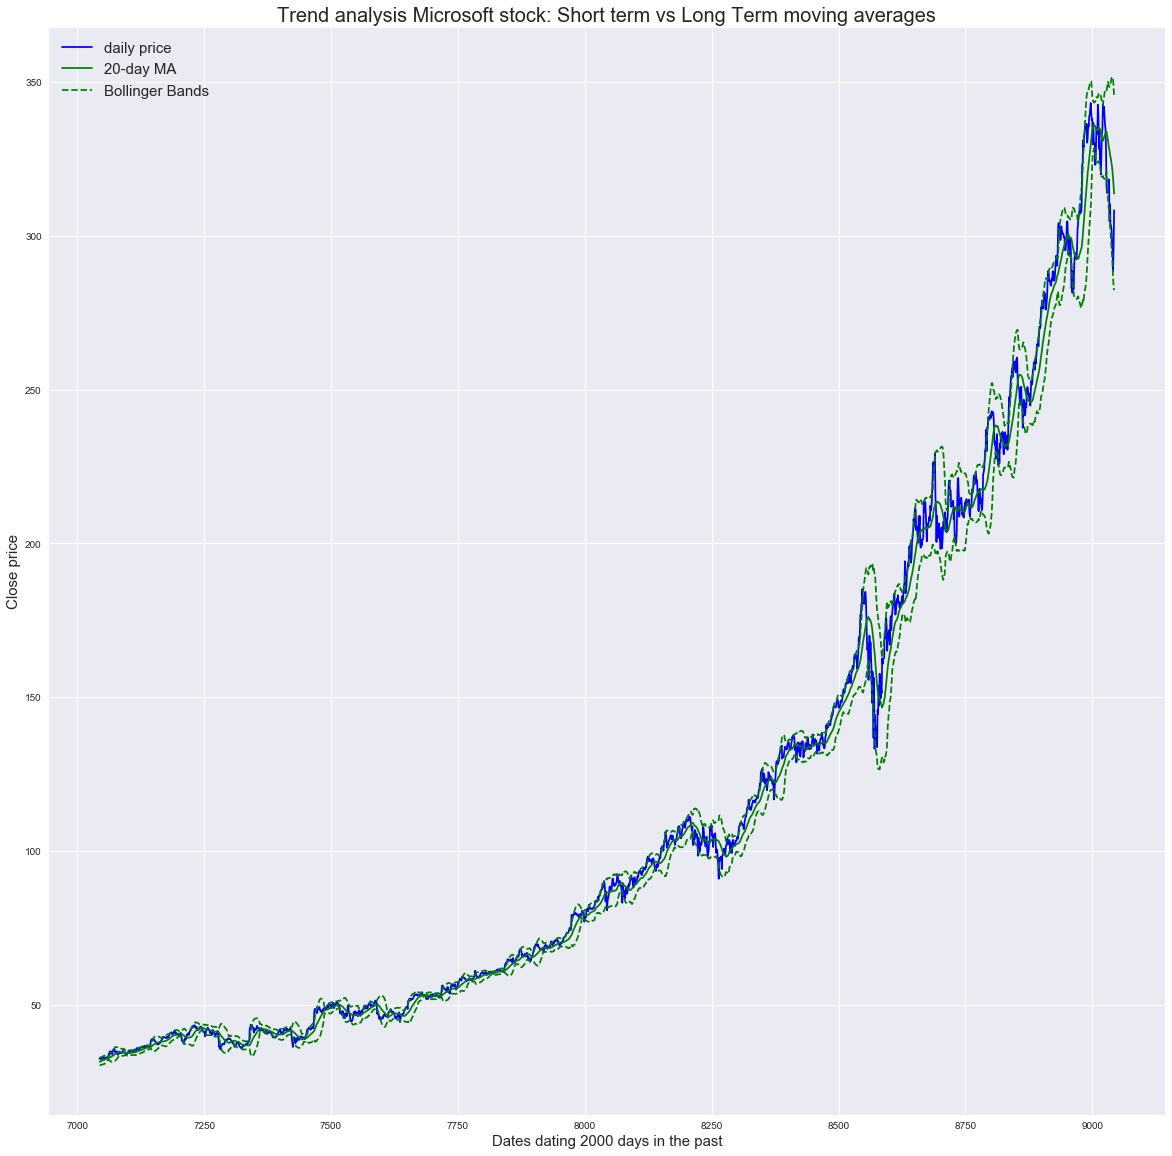

In [25]:
plt.plot(ind, prices, color = "blue")        
plt.plot(ind, mvavg_20s, color = "green")
plt.plot(ind, upper_Bollinger_20s, "--", color = "green")
plt.plot(ind, lower_Bollinger_20s, "--", color = "green")
plt.title("Trend analysis Microsoft stock: Short term vs Long Term moving averages", fontsize=20)
plt.xlabel("Dates dating 2000 days in the past", fontsize=15)
plt.ylabel("Close price", fontsize= 15)
plt.legend(["daily price", "20-day MA", "Bollinger Bands"], fontsize=15)
plt.show()

The basic idea behind Bollinger bands can be summarized as follows:
1. Tightening bands may indicate a sharp price move in either direction and the start of a trend.
2. Expanding bands may indicate the end of a trend.
3. Strong trends have the prices move very closely to the band or even outside.

With this simple trend analysis, I have identified rough buying opportunities using the moving average strategy and looked at the likelihood of the trend to continue. In the next section, I'll create predictions of the stock price and discuss alternative strategies to do this.

**Source:**
1. Long vs short term moving averages as a strategy: https://www.investopedia.com/articles/active-trading/102914/technical-analysis-strategies-beginners.asp
2. Coding example: https://www.youtube.com/watch?v=Hb1l70-at9s&t=302s

#### 2.3.3 Stock price prediction by following the trend: Time series forecasting using machine learning models (Under Construction)

**Business context** In this section, I'll try to predict stock prices based on the trend alone. There are two things of note here:
1. I've given myself 5 days for this project and have been distracted by urgent matters that needed attending. Therefore, I'm in a bit of a time crunch.
2. The basic assumption of time series forecasting is that previous timepoints have meaningful information for future timepoints. This requires that the trends hidden in the data continue uninterrupted. With the merger of Activision Blizzard and Microsoft, there are a lot of uncertainties regarding regulatory action etc. There is therefore good reason to doubt this assumption for Microsoft, though I personally think that its financial fundamentals and strategy are very good and make room for future growth. For the machine learning model, this means that I will prefer an explainable model that gives me further insight into Microsoft's stock over a very accurate one.
3. I also want to develop a general strategy for answering these questions for multiple stocks, once I set up a better data infrastructure. Therefore, I would prefer pursuing one model and establishing a good strategy rather than studying and testing multiple models if in a time crunch, even though it is better practice if you want good accuracy.


**Problem framing** This is a clear time series forecasting problem, a subset of regression problems. Regression problems require the prediction of a numerical output based on a number of other variables. Time series forecasting is a unique kind of regression problem, in which the predictor variables are all previous time points (t-1, t-2, ...) i.e. the different variables are not independent and influence eachother. This requires modifications to the testing strategy (1), which I'll discuss later and also specialized models for the task (2). I have 3 major choices:
1. **Auto Regressive Integrated Moving Average (ARIMA) model**: This strategy is closest to what we did in section 2.3.2. ARIMA is a linear regression model that takes in past time points and past errors to predict future timepoints. Conventional ARIMA only looks at the trend and requires smoothing out seasonal patterns, which can be later brought back (2). This requires a bit more study, but ARIMA is overall a good candidate.  
2. **Prophet**: Prophet is Facebook's recent hype library. It was made specifically to tackle business related questions and has seasonality decomposition baked into the model. It has a straightforward interface similar to sci-kit learn's. Also a very good contender.
3. **Long-term short-term memory networks (LSTM's)**: These are recurrent neural networks with a specific architecture that enables them to handle any kind of sequential data. They are therefore more flexible in accepting other sequential data (e.g. twitter sentiments) and can reach higher accuracies if you give it additional information. In this case however, they are prone to overfitting and the difficulty to interpret the model paramaters is not ideal for understanding the trend better. Therefore, I will not use it here, but keep it in mind for when I improve the data architecture.



Steps in the Time Series development process:
1. Getting, preparing and inspecting the data
2. Investigating seasonality in the time series data
3. Fitting the model and predicting future stock prices

**1. Getting preparing and inspecting the data**

After some consideration, I have decided to go with the ARIMA analysis. The first steps of training a machine learning algorithm is **getting, preparing and inspecting the data**. All of these things have been done extensively in the previous sections, but I'll remake the graph for convenience here and highlight some potential data quality issues I need to look out for when training ML models.

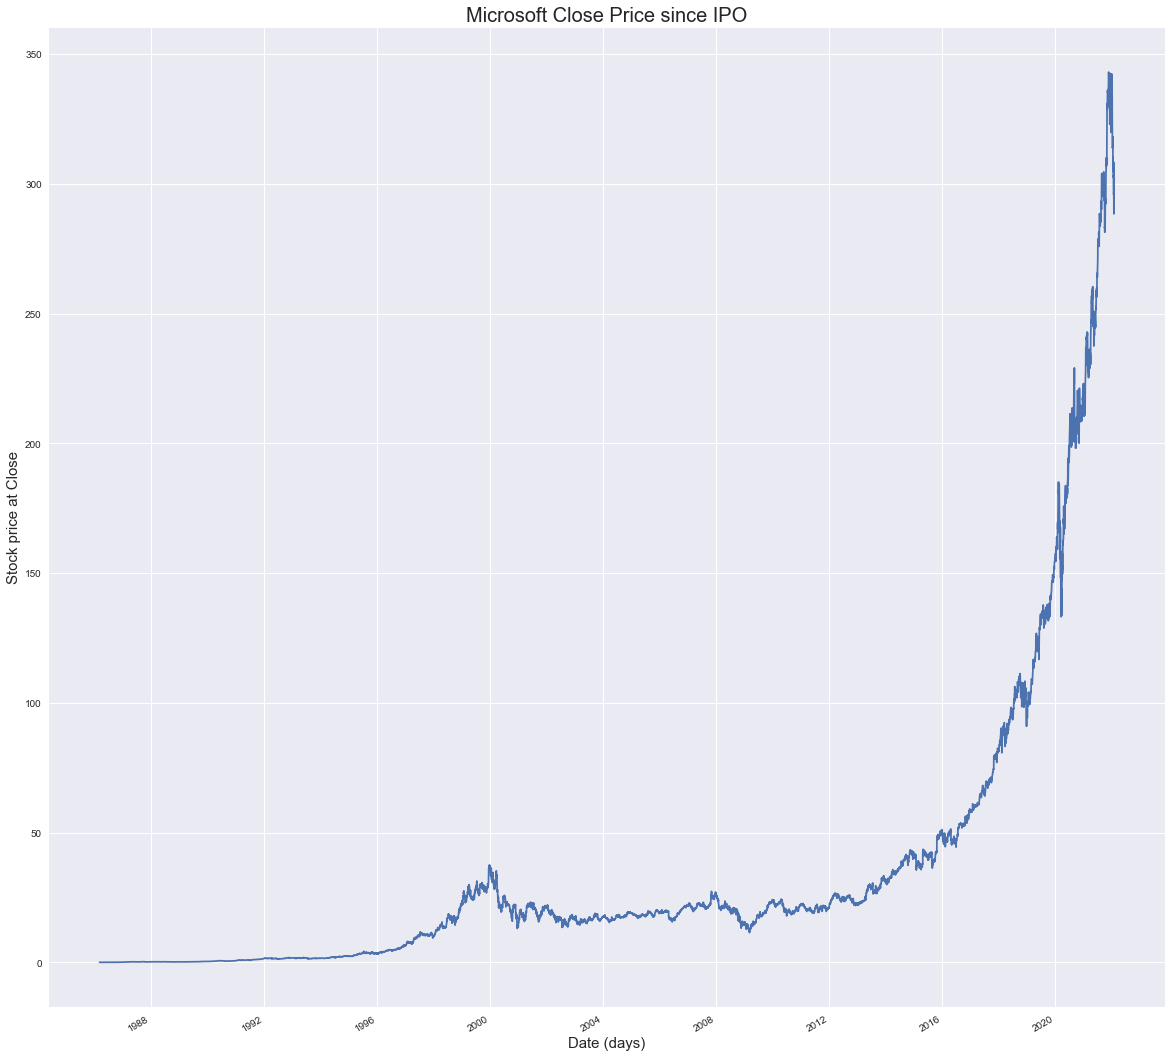

In [26]:
total_history["Close"].plot(use_index=True)
plt.title("Microsoft Close Price since IPO", fontsize = 20)
plt.xlabel("Date (days)", fontsize = 15)
plt.ylabel("Stock price at Close", fontsize = 15)
plt.show()

Let's prepare the history data for analysis. First, I'll keep only the date and the close price, which I want to predict.

In [27]:
df = total_history["Close"]
df = df.reset_index()
df.columns = ["Day", "Close Price"]
print(df.head())

         Day  Close Price
0 1986-03-13     0.061378
1 1986-03-14     0.063570
2 1986-03-17     0.064667
3 1986-03-18     0.063022
4 1986-03-19     0.061926


An important thing to check is the **data types** of the different columns and whether there are **missing values**. This can be done using the info method.


In [28]:
print(df.info())
df.set_index("Day", inplace=True)
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9044 entries, 0 to 9043
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Day          9044 non-null   datetime64[ns]
 1   Close Price  9044 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 141.4 KB
None
            Close Price
Day                    
1986-03-13     0.061378
1986-03-14     0.063570
1986-03-17     0.064667
1986-03-18     0.063022
1986-03-19     0.061926


1. The information in the "Day" column is saved as datetimes. If they had been strings, we would have needed to convert them.
2. The information in the "Close Price" column is saved as floats (numbers). This is again what we need, so no type conversion required.
3. Missing values (null values) can also mess up machine learning training. Luckily there are none in either column (Total number of entries is equal to non-null entries)
4. There are no categorical variables in this dataset. Those need to be recoded as numerical ones before use in machine learning.
5. Variables with bigger values can have outsized effects on what the ML model learns.  Since I'm only using past timepoints to predict the future,  I don't need to worry about putting all features on the same scale (**feature scaling**).

**2. Investigating seasonality in the Time Series data**

A specific thing to test for time series is whether there is a pattern (could be seasonal) on top of the trend. This is called **non-stationarity** and can create problems for the ARIMA model. This can be tested using the **Augmented Dicky-Fuller unit root test**. Let's perform the same test as done in (3):

In [29]:
from statsmodels.tsa.stattools import adfuller
def interpreted_adfuller(time_series):
    result = adfuller(time_series)
    labels = ["Test Statistic", "p-value", "Number of used lags", "Number of used observations"]
    
    for res,lab in zip(result, labels):
        print(lab + " : "+ str(res))
    
    if result[1] <= 0.05:
        print("Reject non-stationarity hypothesis, assume data contains no additional patterns")
    else:
        print("Reject statiority hypothesis, assume data contains additional patterns")
        
interpreted_adfuller(df["Close Price"])
    
    
    

Test Statistic : 7.785008971432875
p-value : 1.0
Number of used lags : 38
Number of used observations : 9005
Reject statiority hypothesis, assume data contains additional patterns


This result is interesting. From eyeballing the graph, I would not have anticipated an additional pattern in the Microsoft stock data, but the statistical test comes out in clear favor of this hypothesis. This means that the ARIMA model needs to be extended with seasonal or other components. These components can be either **added** to the trend or **multiplied** with the trend.  Let's first try to figure out what these components are and how they come together with the trend (6):

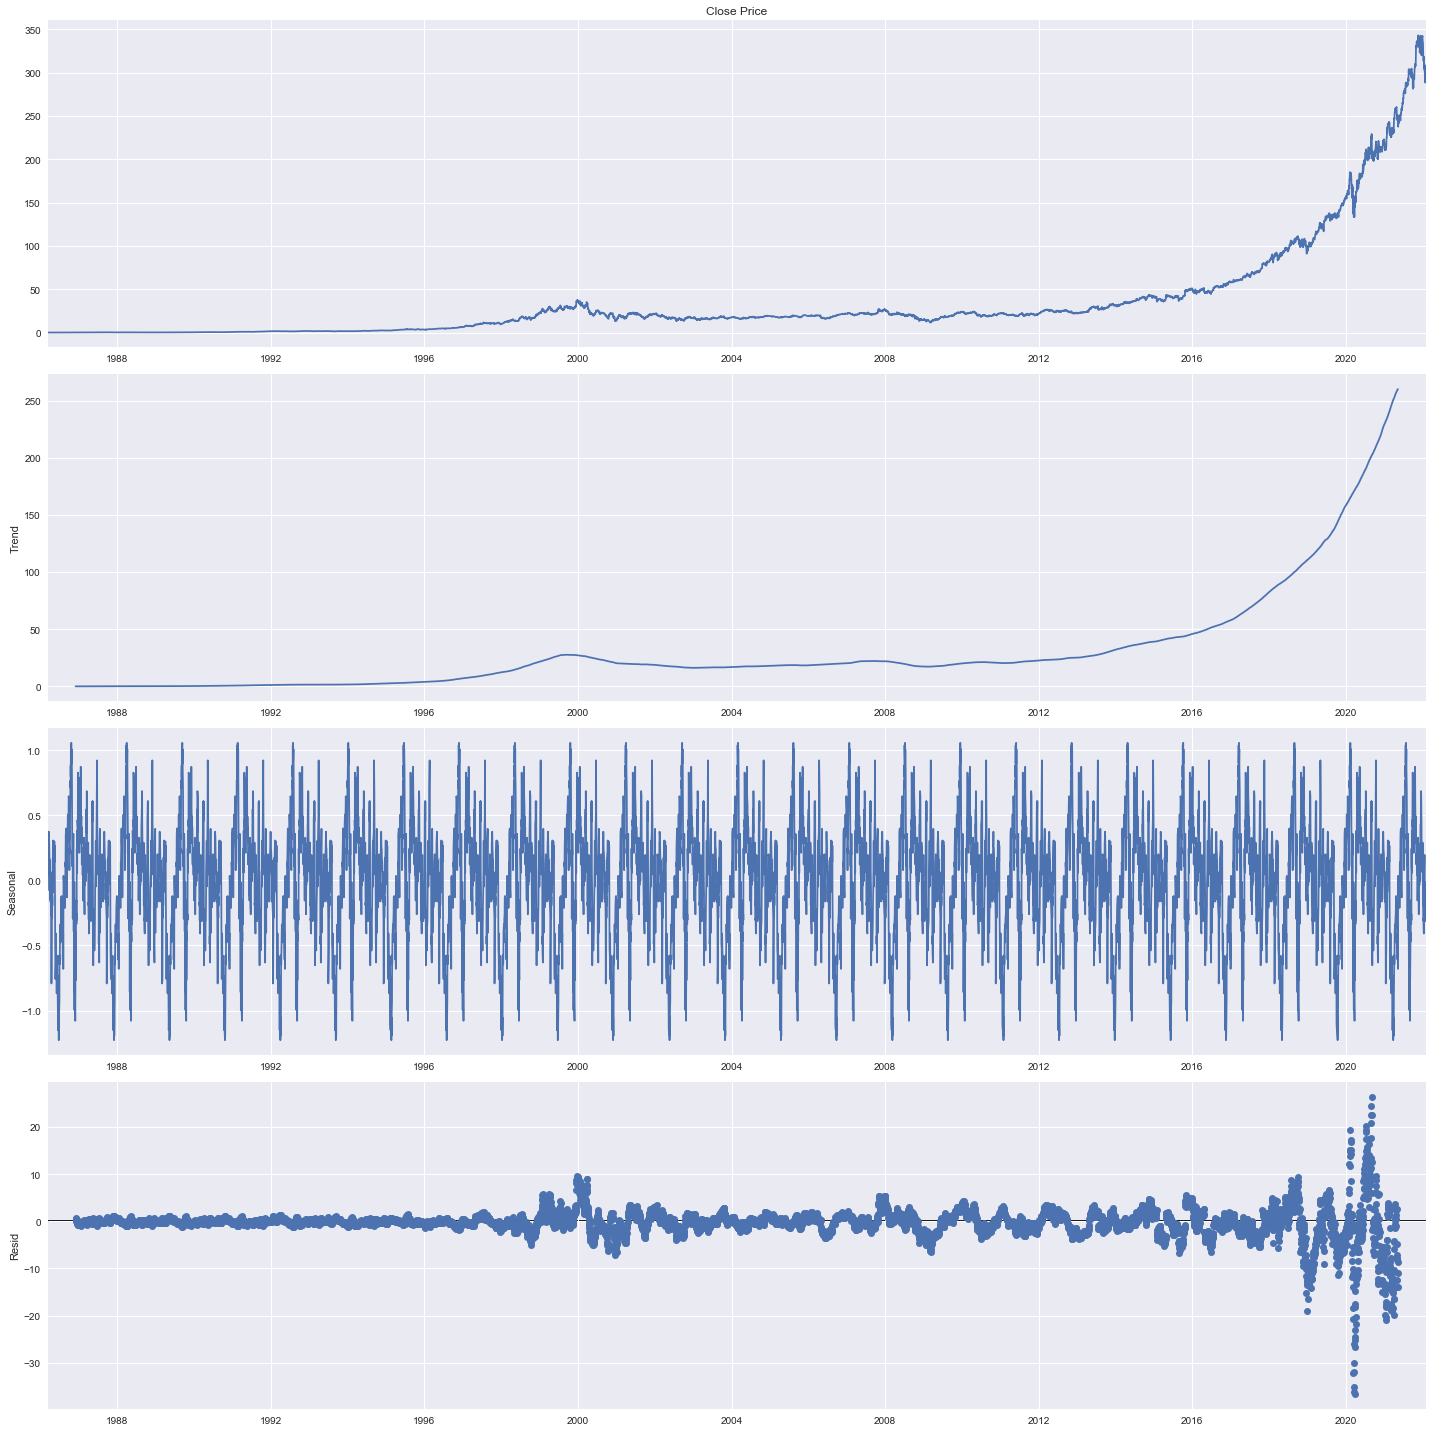

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df["Close Price"], model='additive', period = 365)
result.plot()
plt.show()

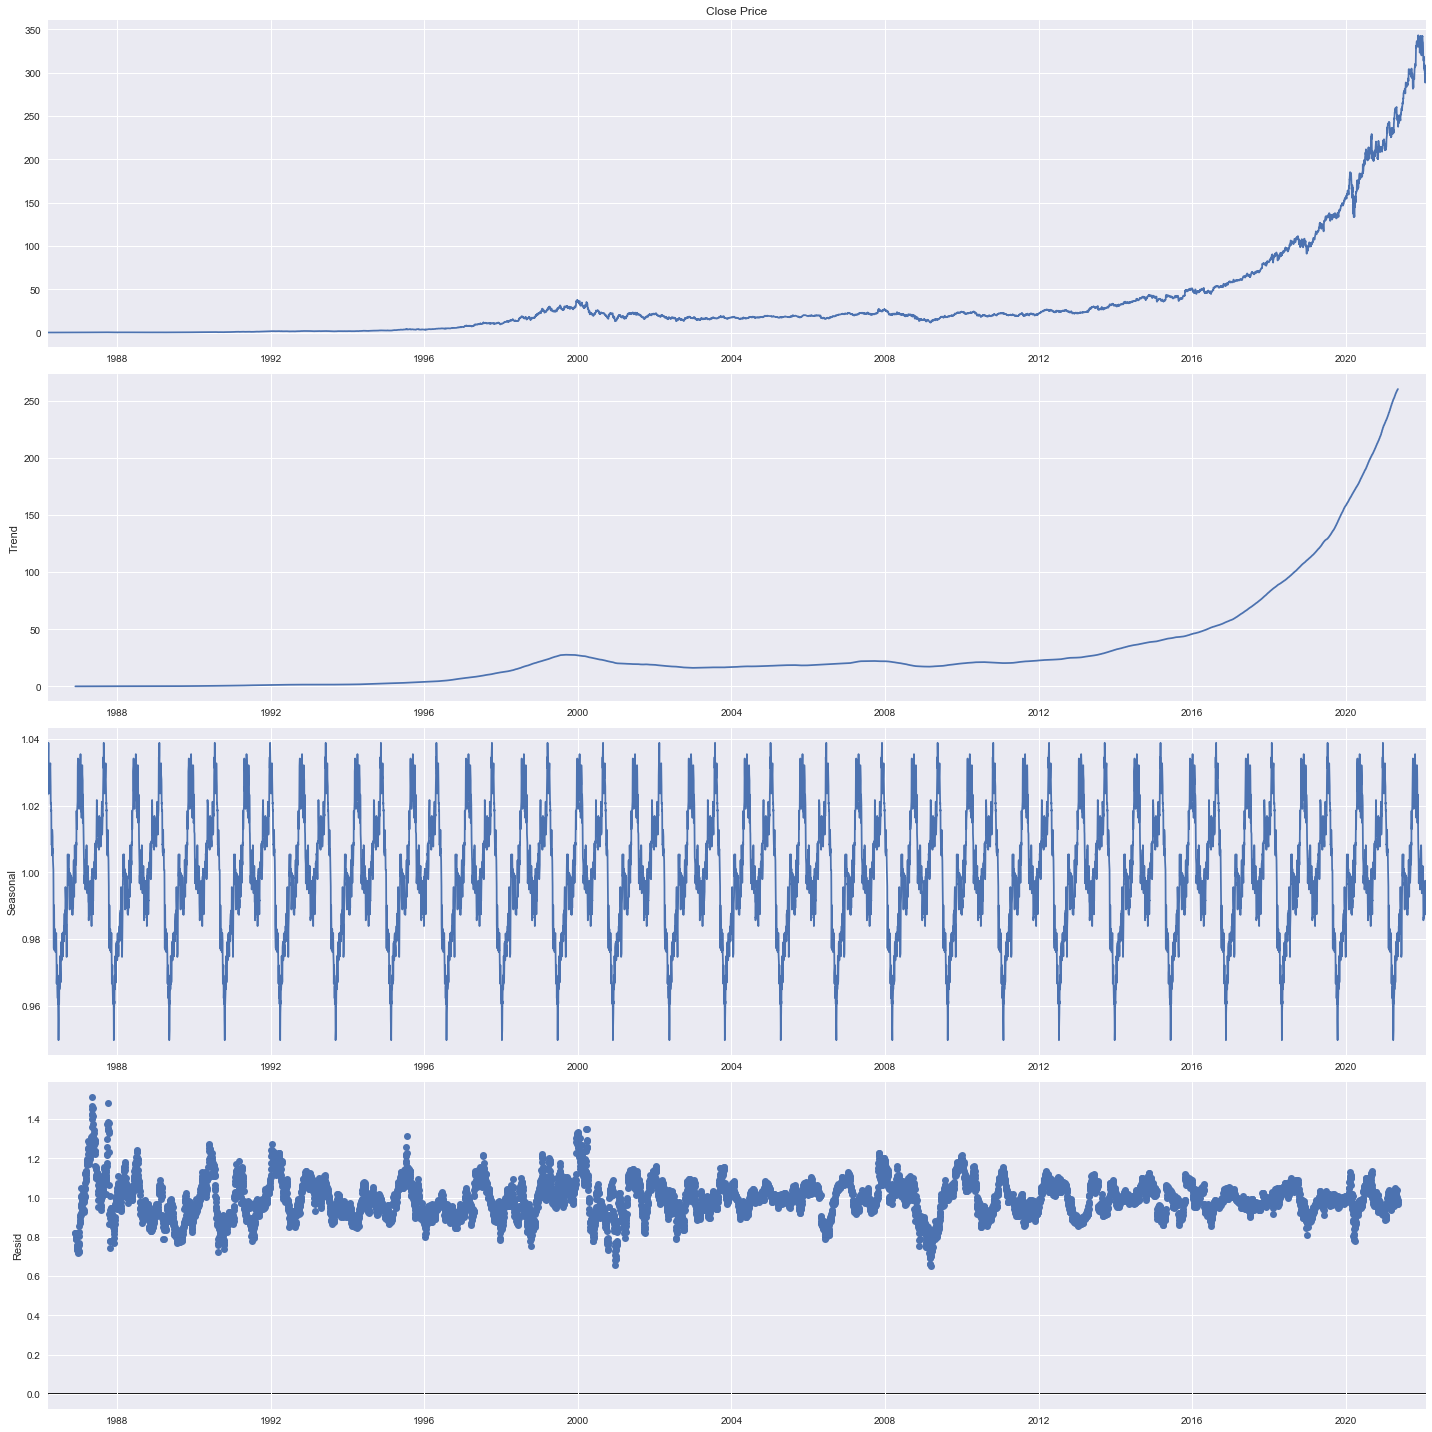

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df["Close Price"], model='multiplicative', period = 365)
result.plot()
plt.show()

I'm not very experienced with interpreting these graphs, but a few things stand out
1. Visually, both seem to catch the overall trend very well. However, I think the seasonal trend is better captured with the multiplicative model.
2. For the most part, the residuals (unexplained errors) are around 0 and 1 respectively. The residuals seem better with the additive model at the beginning of the cure and with the multiplicative model at the end. In fact, the residuals for the additive model seem so off near the end that it seems to be on a whole new order of magnitude. 
Overall, the multiplicative model seems to perform better. 

Looking at this model we seem to have a period of 1-1.5 years in the stock price of Microsoft. This pattern consists of:
1. A steep drop resulting in the overall minimum.
2. An increase to a peak and a milder drop.
3. A new increase
After some digging, I found that there are indeed general seasonal patterns on the stock market, that have nothing to do with the Microsoft stock itself (7).  These patterns seem to match well with what we find here. I conclude that the Microsoft stock price is composed of a long seemingly exponential or parabolic upward trend multiplied by a trend reflecting seasonal changes on the stock market. This also means that I need to keep this component in mind when moving forward. **(SARIMA)**

Let's now identify what the exact period is of the seasonality using autocorrelation functions (ACF).

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


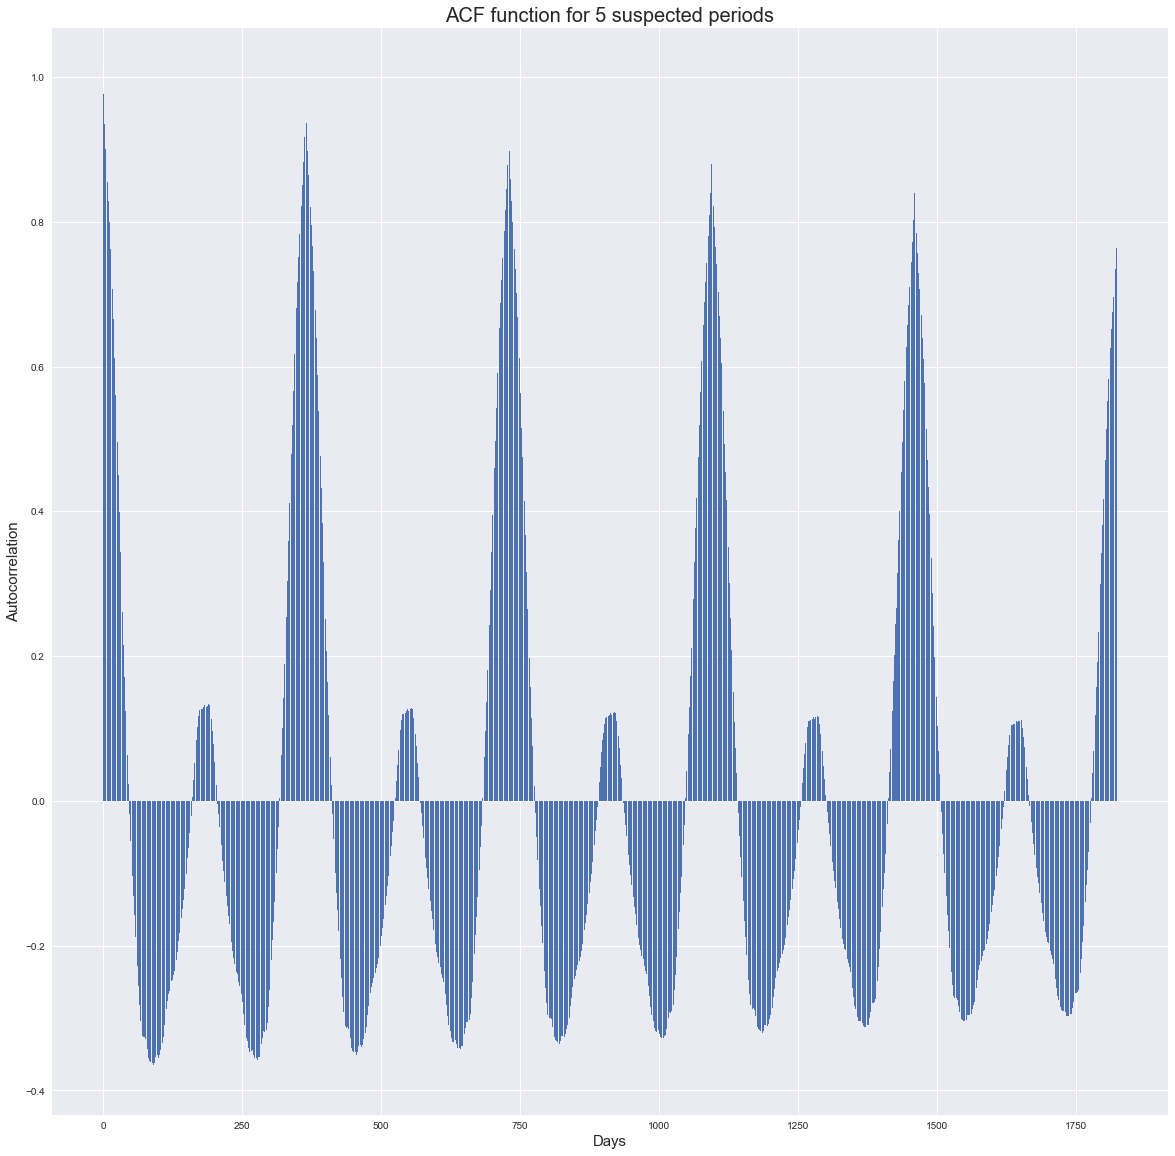

In [32]:
from statsmodels.tsa.stattools import acf
acf_vals = acf(result.seasonal, nlags=5000)
num_lags = 1825
plt.bar(range(num_lags), acf_vals[:num_lags])
plt.title("ACF function for 5 suspected periods", fontsize=20)
plt.xlabel("Days", fontsize = 15)
plt.ylabel("Autocorrelation", fontsize=15)
plt.show()

This ACF shows that, while we observe subpatterns, the overall pattern is repeated every year (365 days). This will be the lag to use for differencing to train the SARIMAX model.

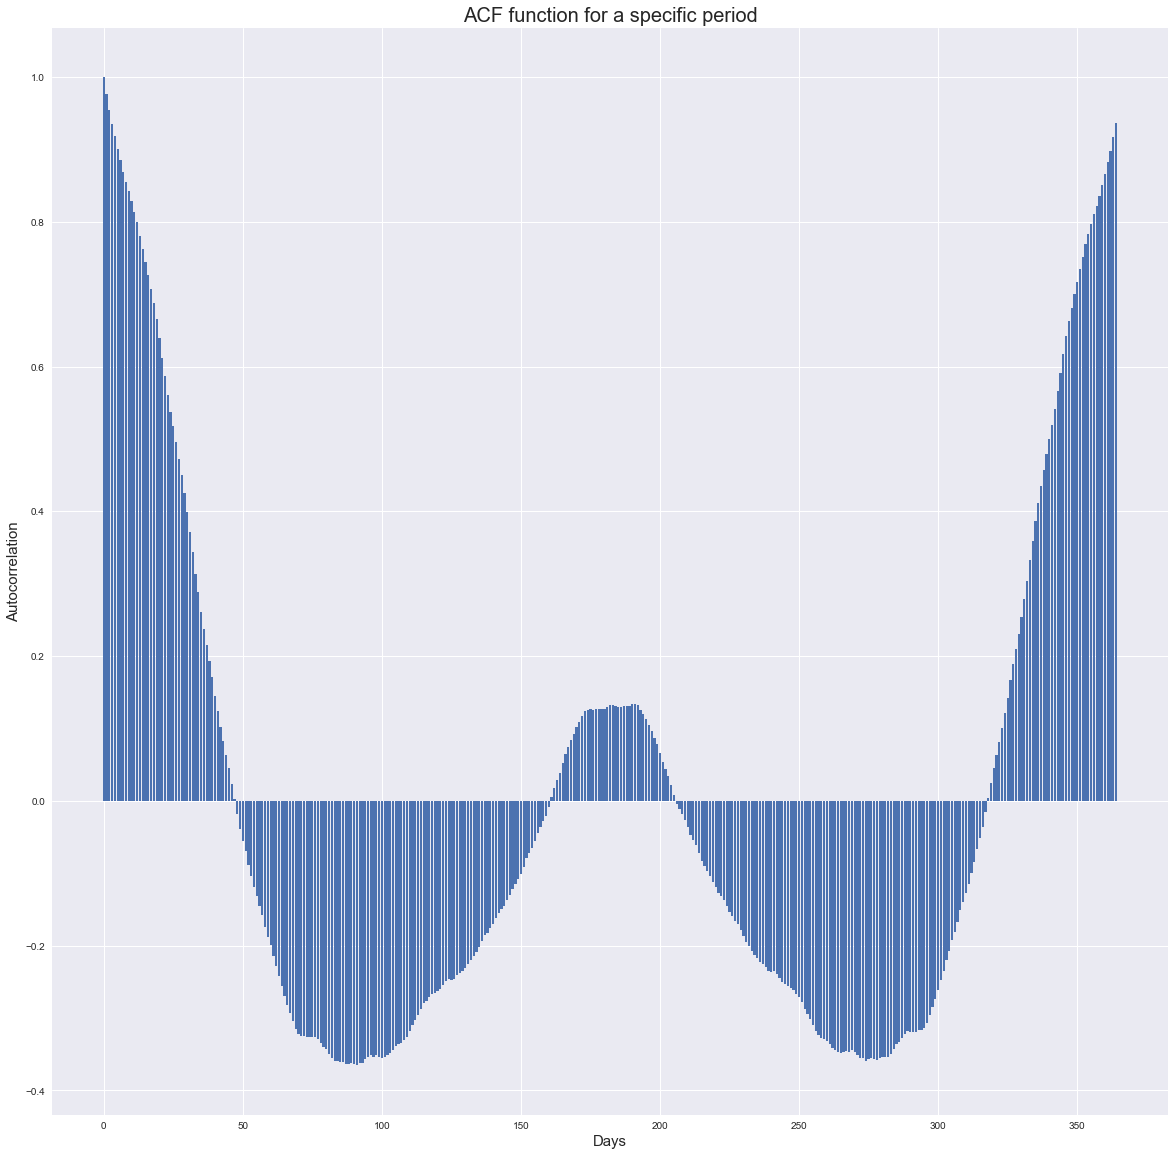

In [33]:
from statsmodels.tsa.stattools import acf
acf_vals = acf(result.seasonal, nlags=1000)
num_lags = 365
plt.bar(range(num_lags), acf_vals[:num_lags])
plt.title("ACF function for a specific period", fontsize=20)
plt.xlabel("Days", fontsize = 15)
plt.ylabel("Autocorrelation", fontsize=15)
plt.show()

**3. Fitting the model and predicting results** (SARIMA model currently not fitting, need to study parameters and model in greater depth) DO NOT RUN CODE CELLS

The first thing to do is splitting the dataset into a **train** and a **test** dataset. The train dataset, usually around 70% of the data, is used to train the model. The test dataset is used to evaluate the model. Using a separate dataset for testing ensures that the model learns general patterns in the data and not idiosyncracies in this particular data. Normally, the train and the test set are sampled randomly from the dataset to not introduce bias. However, since the time points in time series data are so correlated to previous timepoints, I can't do that. Instead, I'll:
1. Cut out everything before 2010, since it is very far from the exponential trend we want to capture
2. Use everything untill 2018 for training
3. Validate the model on the period 2019-2021

In [34]:
cut_off_date = datetime(2010,1,1)
df = df[cut_off_date:]
df.index = pd.DatetimeIndex(df.index).to_period('D')
train_end = datetime(2018,1,1)
test_end = datetime(2022,1,1)
train = df[:train_end]
test = df[train_end:test_end]
print(df.head())
print(train.tail())
print(test.head())

            Close Price
Day                    
2010-01-04    23.904982
2010-01-05    23.912704
2010-01-06    23.765955
2010-01-07    23.518799
2010-01-08    23.681002
            Close Price
Day                    
2017-12-22    81.280579
2017-12-26    81.176018
2017-12-27    81.470703
2017-12-28    81.480202
2017-12-29    81.309097
            Close Price
Day                    
2018-01-02    81.698814
2018-01-03    82.079025
2018-01-04    82.801445
2018-01-05    83.828033
2018-01-08    83.913559


With this in hand, I can now train the SARIMA model. Like any Machine Learning model, the SARIMA model requires **hyperparameters** which are set prior to model training and which correspond to the different components of the model The SARIMA model consists of several components.
1. **S**easonal component: This part models the seasonal part of the data. Its hyperparameter **m** stands for the period of the seasonal pattern, which is 365 days in this case. Furthermore, it requires similar parameters (p,d,q) as the trend part of the model.
2. **A**uto**R**egressive: This part does predicting. It is regressive in that it predicts a number and it is auto in that it uses previous time points to do it. The hyperparameter **p** defines which timepoints you use for the prediction. This can be 1 if you want to use the last timepoint alone, another number or a tuple of numbers if you want to use a list of previous timepoints. I set p to 1 in this example.
3. **I**ntegrated: This refers to the replacement of the data by a difference i.e. each timepoint is replaced by the difference of this timepoint with previous timepoints. The hyperparameter **d** stands for the number of lags between the timepoint and its predecessor. I'll set this to d=0 for now.
4. **M**oving **A**verage: This part also predicts the next value, but it now defines the next value as a mean value plus corrected error terms. Its hyperparameter **q** also defines the timepoints used for prediction. I'll put q=1 for now.


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

trend_order = (1,1,1)
seasonal_order = (1,1,1,365)
model = SARIMAX(train, order = trend_order, seasonal_order=seasonal_order, enforce_stationarity=True, enforce_invertibility=True)
model_fit = model.fit()
print(model_fit.summary())

Now that the model is fit, I can do predictions with it on the test data and see how well it performs.

In [ ]:
predictions = model_fit.forecast(len(test))
predictions = pd.Series(predictions, index = test.index)
residuals = test - predictions
plt.plot(residuals)
plt.axhline(0, linestyle = "--")
plt.title("Residuals from SARIMA model", fontsize=20)
plt.ylabel("Error", fontsize = 15)

Let's also plot test on top of the predictions


In [ ]:
plt.plot(test)
plt.plot(predictions)
plt.title("Predictions vs test")

**4. Final comments and creating an improved model**

After testing the model, the following things can be done to create even better models:
1. **Improving my guess of the hyperparameters**: Contrary to what I expected, the SARIMA model does not fit the data if the hyperparameters are not reasonably good. I expected to get a bad model, which could be evaluated and improved upon. To deal with the bad fitting, I need to improve my guess of the hyperparameters and study the properties of the model more.
2. **Hyperparameter tuning**: We can play around with the hyperparameters of the model and see how it affects error metrics within the dataset. We can train many models with either randomly generated hyperparameters (**random search**) or parameters from a parameter space we define. This is usually done multiple times on many different subsets of the train data (**folds**) to prevent overfitting. The final optimized model is then still tested on the test data. Before I can do this, I need to speed up the training of a single model and this seems to require a deeper understanding of the model.
3. **Testing different models**: SARIMA is not the only model that could be used for this problem as stated above. Prophet or the LSTM could be tested as well.
4. **Adding more data**: Right now, I am predicting the stock price based on previous stock prices. However, other factors could play a role e.g. average sector prices, twitter sentiment about the company, stock price movements of competitors etc.

**Source**
1. Cross validation on Time series data: https://medium.com/@soumyachess1496/cross-validation-in-time-series-566ae4981ce4
2. Comparison of ARIMA, Prophet and LSTM's: https://neptune.ai/blog/arima-vs-prophet-vs-lstm
3. Coding Example using ARIMA:
4. Hands-on Machine Learning with Sci-kit Learn, Keras and Tensorflow
5. Information about augmented Dickey-Fuller tests: https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html
6. Automatic Time Series Decomposition: https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/
7. S&P 500 Seasonal Patterns: https://vantagepointtrading.com/stock-market-seasonal-trends-sp-500-seasonal-trends/
8. Fitting SARIMAX models : https://www.youtube.com/watch?v=Al8m6K_stfA
9. How are time series different: https://www.youtube.com/watch?v=ZoJ2OctrFLA&list=PLvcbYUQ5t0UHOLnBzl46_Q6QKtFgfMGc3

# 3. Conclusions and Future perspectives

**Conclusions** The goal of this part 1 of the project was to gain insight into financial data and to make the financial data more digestible, learn how to intepret it, identify relevant patterns and identify bottlenecks to creating more advanced trading strategies. To this end, I used the yfinance data of Microsoft for exploration. Using a bunch of fundamental ratio's, I concluded that Microsoft is financially viable, both in the short and the long term and generating hefty profits. Using technical analysis and moving average analysis, I found that it was the right time to buy Microsoft stocks until their very recent acquisition of Blizzard, which caused a break with the generally upward trend. Using seasonal decomposition models and statistical tests, I showed that the stock price of Microsoft is determined by (1) a generally upward trend, especially in the last years and (2) yearly fluctuations in the trend that correspond with general seasonal changes in stock prices that have nothing to do with Microsofts stock itself. It would however be wise to keep these changes in mind when buying or shorting their stock.

**Future directions**: The following things will need to be done if I want to make a more advanced solution:
1. **Data storage and engineering**: The yfinance library is made for ad-hoc analyses of the kind I just did. I need to find a more stable API (possibly pay for it) that allows more calls. During this project, I noticed that stock datasets, even for a handful of stocks, become really large, even for a handful of them. If I want to move to automated trading, I need minute-to-minute data, further compounding the problem. I'll therefore look into cloud storage solutions that are flexible in the size of datasets I can store as well as are always online.
2. **Data Science**: I've already explained in the previous section, what I could do to build better models. Time series analysis was unexpectedly hard, compared to regular regression problems and I need to do a lot more study to optimize this proces, ranging from making better guesses about hyperparameters to dealing with the thorny problems related to model testing of time series problems. Additionally, there are a lot of other Data Science problems in setting up good trading strategies worth considering, including identifying correlated stock price movements to reduce risk or capture market sentiment quickly from Twitter or company communications.

All in all, I believe this process has brought me a big step closer to becoming a better investor and has given me a lot to work on.